##### This file is created to explore the input data for soccer shots on target prediction project

In [664]:
import pandas as pd
import numpy as np

from matplotlib import pyplot
import seaborn

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [665]:
# file_path = r"../../../data/NCAA/input_data/ncaa_2024_input_data_v001.csv"
file_path = r"../../../../data/NFL/input_data/nfl_2024_input_data_v001.csv"
team_stats_file_path = r"../../../../data/NFL/input_data/nfl_2024_team_stats_v001.xlsx"

df = pd.read_csv(file_path)
df_team = pd.read_excel(team_stats_file_path)
# df = pd.read_excel(file_path, sheet_name= 0, skiprows=[1])

C:\Users\PrudhviRajuV\AppData\Local\Temp\ipykernel_42392\3216355241.py:5: DtypeWarning: Columns (182) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [666]:
df.head()
df_team.head()

,game_id,game_sr_id,team_name,team_id,team_sr_id,opponent_name,opponent_id,opponent_sr_id,team_market,team_alias,game_date,rushing_avg_yards,rushing_attempts,rushing_touchdowns,rushing_tlost,rushing_tlost_yards,rushing_yards,rushing_longest,rushing_redzone_attempts,rushing_first_downs,rushing_broken_tackles,rushing_kneel_downs,rushing_scrambles,rushing_yards_after_contact,receiving_targets,receiving_receptions,receiving_avg_yards,receiving_yards,receiving_touchdowns,receiving_yards_after_catch,receiving_longest,receiving_longest_touchdown,receiving_redzone_targets,receiving_air_yards,receiving_first_downs,receiving_broken_tackles,receiving_dropped_passes,receiving_catchable_passes,receiving_yards_after_contact,punts_attempts,punts_yards,punts_net_yards,punts_blocked,punts_touchbacks,punts_inside_20,punts_return_yards,punts_avg_net_yards,punts_avg_yards,punts_longest,punts_hang_time,punts_avg_hang_time,punt_returns_avg_yards,punt_returns_yards,punt_returns_longest,punt_returns_touchdowns,punt_returns_faircatches,punt_returns_number,penalties_penalties,penalties_yards,penalties_first_downs,passing_attempts,passing_completions,passing_cmp_pct,passing_interceptions,passing_sack_yards,passing_rating,passing_touchdowns,passing_avg_yards,passing_sacks,passing_longest,passing_longest_touchdown,passing_air_yards,passing_redzone_attempts,passing_net_yards,passing_yards,passing_first_downs,passing_int_touchdowns,passing_throw_aways,passing_poor_throws,passing_defended_passes,passing_dropped_passes,passing_spikes,passing_blitzes,passing_hurries,passing_knockdowns,passing_pocket_time,passing_avg_pocket_time,passing_batted_passes,passing_on_target_throws,misc_returns_yards,misc_returns_touchdowns,misc_returns_blk_fg_touchdowns,misc_returns_blk_punt_touchdowns,misc_returns_fg_return_touchdowns,misc_returns_ez_rec_touchdowns,misc_returns_number,kickoffs_endzone,kickoffs_inside_20,kickoffs_return_yards,kickoffs_touchbacks,kickoffs_yards,kickoffs_out_of_bounds,kickoffs_number,kickoffs_total_endzone,kickoffs_onside_attempts,kickoffs_onside_successes,kickoffs_squib_kicks,kick_returns_avg_yards,kick_returns_yards,kick_returns_longest,kick_returns_touchdowns,kick_returns_faircatches,kick_returns_number,int_returns_avg_yards,int_returns_yards,int_returns_longest,int_returns_touchdowns,int_returns_number,fumbles_fumbles,fumbles_lost_fumbles,fumbles_own_rec,fumbles_own_rec_yards,fumbles_opp_rec,fumbles_opp_rec_yards,fumbles_out_of_bounds,fumbles_forced_fumbles,fumbles_own_rec_tds,fumbles_opp_rec_tds,fumbles_ez_rec_tds,field_goals_attempts,field_goals_made,field_goals_blocked,field_goals_yards,field_goals_avg_yards,field_goals_longest,field_goals_net_attempts,field_goals_missed,field_goals_pct,field_goals_attempts_19,field_goals_attempts_29,field_goals_attempts_39,field_goals_attempts_49,field_goals_attempts_50,field_goals_made_19,field_goals_made_29,field_goals_made_39,field_goals_made_49,field_goals_made_50,defense_tackles,defense_assists,defense_combined,defense_sacks,defense_sack_yards,defense_interceptions,defense_passes_defended,defense_forced_fumbles,defense_fumble_recoveries,defense_qb_hits,defense_tloss,defense_tloss_yards,defense_safeties,defense_sp_tackles,defense_sp_assists,defense_sp_forced_fumbles,defense_sp_fumble_recoveries,defense_sp_blocks,defense_misc_tackles,defense_misc_assists,defense_misc_forced_fumbles,defense_misc_fumble_recoveries,defense_sp_own_fumble_recoveries,defense_sp_opp_fumble_recoveries,defense_def_targets,defense_def_comps,defense_blitzes,defense_hurries,defense_knockdowns,defense_missed_tackles,defense_batted_passes,defense_three_and_outs_forced,defense_fourth_down_stops,first_downs_pass,first_downs_penalty,first_downs_rush,first_downs_total,interceptions_return_yards,interceptions_returned,interceptions_number,touchdowns_pass,touchdowns_rush,touchdowns_total_return,touchdowns_total,touchdowns_fumble_return,touchdowns_int_return,touchdowns_kick_return,touchdowns_punt_return,touchdowns_other,efficiency_goaltogo_attem

In [667]:
df.columns.to_list()

['game_id',
 'player_name',
 'player_id',
 'team_name',
 'opponent_name',
 'team_id',
 'team_market',
 'team_alias',
 'team_position',
 'team_jersey',
 'rushing_sr_id',
 'rushing_first_downs',
 'rushing_avg_yards',
 'rushing_attempts',
 'rushing_touchdowns',
 'rushing_yards',
 'rushing_longest',
 'rushing_redzone_attempts',
 'rushing_tlost',
 'rushing_tlost_yards',
 'rushing_broken_tackles',
 'rushing_kneel_downs',
 'rushing_scrambles',
 'rushing_yards_after_contact',
 'receiving_sr_id',
 'receiving_first_downs',
 'receiving_receptions',
 'receiving_targets',
 'receiving_yards',
 'receiving_avg_yards',
 'receiving_longest',
 'receiving_touchdowns',
 'receiving_yards_after_catch',
 'receiving_redzone_targets',
 'receiving_air_yards',
 'receiving_broken_tackles',
 'receiving_dropped_passes',
 'receiving_catchable_passes',
 'receiving_yards_after_contact',
 'receiving_longest_touchdown',
 'punts_sr_id',
 'punts_attempts',
 'punts_yards',
 'punts_avg_yards',
 'punts_blocked',
 'punts_longe

In [668]:
df[df['team_position'] == 'QB'].head()

,game_id,player_name,player_id,team_name,opponent_name,team_id,team_market,team_alias,team_position,team_jersey,rushing_sr_id,rushing_first_downs,rushing_avg_yards,rushing_attempts,rushing_touchdowns,rushing_yards,rushing_longest,rushing_redzone_attempts,rushing_tlost,rushing_tlost_yards,rushing_broken_tackles,rushing_kneel_downs,rushing_scrambles,rushing_yards_after_contact,receiving_sr_id,receiving_first_downs,receiving_receptions,receiving_targets,receiving_yards,receiving_avg_yards,receiving_longest,receiving_touchdowns,receiving_yards_after_catch,receiving_redzone_targets,receiving_air_yards,receiving_broken_tackles,receiving_dropped_passes,receiving_catchable_passes,receiving_yards_after_contact,receiving_longest_touchdown,punts_sr_id,punts_attempts,punts_yards,punts_avg_yards,punts_blocked,punts_longest,punts_touchbacks,punts_inside_20,punts_avg_net_yards,punts_return_yards,punts_net_yards,punts_hang_time,punts_avg_hang_time,punt_returns_sr_id,punt_returns_yards,punt_returns_avg_yards,punt_returns_touchdowns,punt_returns_longest,punt_returns_faircatches,punt_returns_number,penalties_sr_id,penalties_first_downs,penalties_penalties,penalties_yards,passing_sr_id,passing_first_downs,passing_attempts,passing_completions,passing_cmp_pct,passing_yards,passing_avg_yards,passing_sacks,passing_sack_yards,passing_touchdowns,passing_longest,passing_interceptions,passing_rating,passing_longest_touchdown,passing_air_yards,passing_redzone_attempts,passing_int_touchdowns,passing_throw_aways,passing_poor_throws,passing_defended_passes,passing_dropped_passes,passing_spikes,passing_blitzes,passing_hurries,passing_knockdowns,passing_pocket_time,passing_avg_pocket_time,passing_batted_passes,passing_on_target_throws,kickoffs_sr_id,kickoffs_endzone,kickoffs_inside_20,kickoffs_return_yards,kickoffs_touchbacks,kickoffs_yards,kickoffs_out_of_bounds,kickoffs_number,kickoffs_total_endzone,kickoffs_onside_attempts,kickoffs_onside_successes,kickoffs_squib_kicks,kick_returns_sr_id,kick_returns_avg_yards,kick_returns_yards,kick_returns_longest,kick_returns_touchdowns,kick_returns_faircatches,kick_returns_number,int_returns_sr_id,int_returns_avg_yards,int_returns_yards,int_returns_longest,int_returns_touchdowns,int_returns_number,fumbles_sr_id,fumbles_fumbles,fumbles_lost_fumbles,fumbles_own_rec,fumbles_own_rec_yards,fumbles_opp_rec,fumbles_opp_rec_yards,fumbles_out_of_bounds,fumbles_forced_fumbles,fumbles_own_rec_tds,fumbles_opp_rec_tds,fumbles_ez_rec_tds,field_goals_sr_id,field_goals_attempts,field_goals_made,field_goals_blocked,field_goals_yards,field_goals_avg_yards,field_goals_longest,field_goals_missed,field_goals_pct,field_goals_attempts_19,field_goals_attempts_29,field_goals_attempts_39,field_goals_attempts_49,field_goals_attempts_50,field_goals_made_19,field_goals_made_29,field_goals_made_39,field_goals_made_49,field_goals_made_50,defense_sr_id,defense_tackles,defense_assists,defense_combined,defense_sacks,defense_sack_yards,defense_interceptions,defense_passes_defended,defense_forced_fumbles,defense_fumble_recoveries,defense_qb_hits,defense_tloss,defense_tloss_yards,defense_safeties,defense_sp_tackles,defense_sp_assists,defense_sp_forced_fumbles,defense_sp_fumble_recoveries,defense_sp_blocks,defense_misc_tackles,defense_misc_assists,defense_misc_forced_fumbles,defense_misc_fumble_recoveries,defense_sp_own_fumble_recoveries,defense_sp_opp_fumble_recoveries,defense_def_targets,defense_def_comps,defense_blitzes,defense_hurries,defense_knockdowns,defense_missed_tackles,defense_batted_passes,rushing_longest_touchdown,misc_returns_sr_id
2,0066198b-955a-4008-be7e-dc52522b4d74,Geno Smith,cfc93f5e-105e-4a5e-88d3-f4279893cfa8,Seahawks,Cardinals,3d08af9e-c767-4f88-a7dc-b920c6d2b4a8,Seattle,SEA,QB,7.0,sr:player:830531,0.0,0.667,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [669]:
df.team_position.unique()

array(['RB', 'QB', 'WR', 'TE', 'P', 'CB', 'K', 'DT', 'FS', 'SS', 'DE',
       'OLB', 'LB', 'NT', 'OL', 'DL', 'SAF', 'C', 'OT', 'G', 'DB', 'MLB',
       'T', 'OG', 'FB', 'LS'], dtype=object)

In [670]:
df.columns.to_list()

['game_id',
 'player_name',
 'player_id',
 'team_name',
 'opponent_name',
 'team_id',
 'team_market',
 'team_alias',
 'team_position',
 'team_jersey',
 'rushing_sr_id',
 'rushing_first_downs',
 'rushing_avg_yards',
 'rushing_attempts',
 'rushing_touchdowns',
 'rushing_yards',
 'rushing_longest',
 'rushing_redzone_attempts',
 'rushing_tlost',
 'rushing_tlost_yards',
 'rushing_broken_tackles',
 'rushing_kneel_downs',
 'rushing_scrambles',
 'rushing_yards_after_contact',
 'receiving_sr_id',
 'receiving_first_downs',
 'receiving_receptions',
 'receiving_targets',
 'receiving_yards',
 'receiving_avg_yards',
 'receiving_longest',
 'receiving_touchdowns',
 'receiving_yards_after_catch',
 'receiving_redzone_targets',
 'receiving_air_yards',
 'receiving_broken_tackles',
 'receiving_dropped_passes',
 'receiving_catchable_passes',
 'receiving_yards_after_contact',
 'receiving_longest_touchdown',
 'punts_sr_id',
 'punts_attempts',
 'punts_yards',
 'punts_avg_yards',
 'punts_blocked',
 'punts_longe

In [671]:
# df = df.drop(columns=['team'])
df.team_position.unique()

array(['RB', 'QB', 'WR', 'TE', 'P', 'CB', 'K', 'DT', 'FS', 'SS', 'DE',
       'OLB', 'LB', 'NT', 'OL', 'DL', 'SAF', 'C', 'OT', 'G', 'DB', 'MLB',
       'T', 'OG', 'FB', 'LS'], dtype=object)

In [672]:
df.passing_yards.value_counts(normalize=True).sort_index()

passing_yards
-4.0      0.001479
-2.0      0.002959
 0.0      0.056213
 1.0      0.002959
 2.0      0.002959
 3.0      0.008876
 4.0      0.004438
 5.0      0.005917
 6.0      0.008876
 7.0      0.001479
 8.0      0.001479
 11.0     0.002959
 13.0     0.002959
 14.0     0.002959
 16.0     0.002959
 17.0     0.002959
 18.0     0.002959
 19.0     0.004438
 20.0     0.001479
 21.0     0.002959
 22.0     0.004438
 23.0     0.001479
 24.0     0.007396
 25.0     0.001479
 28.0     0.002959
 34.0     0.002959
 35.0     0.002959
 36.0     0.001479
 37.0     0.001479
 38.0     0.002959
 41.0     0.001479
 45.0     0.001479
 46.0     0.001479
 49.0     0.001479
 50.0     0.001479
 52.0     0.001479
 54.0     0.001479
 56.0     0.001479
 58.0     0.001479
 60.0     0.001479
 64.0     0.001479
 67.0     0.001479
 68.0     0.001479
 69.0     0.002959
 70.0     0.001479
 71.0     0.001479
 74.0     0.002959
 79.0     0.002959
 80.0     0.001479
 82.0     0.002959
 83.0     0.001479
 84.0     0.00147

In [673]:
# # Ensure 'game_date' is in datetime format
# df['game_date'] = pd.to_datetime(df['game_date'])

# print("Original DataFrame head:")
# print(df.head())
# print("\n" + "="*50 + "\n")

# # --- Player-Level Offensive Metrics ---

# # player_total_shots
# df['player_total_shots'] = df['shots_on_target'] + df['shots_off_target'] + df['shots_blocked']

# # player_shot_accuracy
# # Use np.where to handle division by zero (if player_total_shots is 0, accuracy is 0)
# # df['player_shot_accuracy'] = np.where(
# #     df['player_total_shots'] == 0,
# #     0,
# #     df['shots_on_target'] / df['player_total_shots']
# # )

# # player_goal_contribution
# df['player_goal_contribution'] = df['goals_scored'] + df['assists']

# # player_offensive_action_ratio
# # Use np.where to handle division by zero
# # df['player_offensive_action_ratio'] = np.where(
# #     df['player_total_shots'] == 0,
# #     0,
# #     (df['goals_scored'] + df['assists'] + df['shots_on_target']) / df['player_total_shots']
# # )

# # player_aerial_goal_ratio
# # Use np.where to handle division by zero
# df['player_aerial_goal_ratio'] = np.where(
#     df['goals_scored'] == 0,
#     0,
#     df['goals_by_head'] / df['goals_scored']
# )

# # --- Player-Level Game Participation & Discipline Metrics ---

# # player_discipline_score
# df['player_discipline_score'] = df['yellow_cards'] + (df['red_cards'] * 2) + df['yellow_red_cards']

# # is_starter (already available as 'starter', but explicitly naming for clarity)
# # No calculation needed, just for conceptual mapping
# df['is_starter'] = df['starter']

# # player_played_full_game
# df['player_played_full_game'] = ((df['starter'] == 1) & (df['substituted_out'] == 0)).astype(int)

# # --- Venue/Game Context Metrics ---

# # attendance_ratio
# # Use np.where to handle division by zero
# df['attendance_ratio'] = np.where(
#     df['venue_capacity'] == 0,
#     0,
#     df['attendance'] / df['venue_capacity']
# )


# # --- Time-Based Features (Derived from game_date) ---

# # game_day_of_week
# df['game_day_of_week'] = df['game_date'].dt.dayofweek # Monday=0, Sunday=6

# # game_month
# df['game_month'] = df['game_date'].dt.month

# # game_year
# df['game_year'] = df['game_date'].dt.year

In [674]:
# df.team.unique()

In [675]:
# games_played = df.groupby('player_id')['game_id'].count().reset_index()

# print(games_played.head())

# # Filter for players who have played at least 2 games
# players_at_least_2_games = games_played[games_played['game_id'] >= 2 ]

# print(players_at_least_2_games.head())
# # Get the number of unique player IDs in the filtered result
# unique_players_count = players_at_least_2_games.nunique()

# print(df['player_id'].describe(), unique_players_count)

# # df[df['player_id'].isin(players_at_least_2_games.player_id.unique())]['date'].count()

In [676]:
# round(df.notnull().sum()* 100/len(df),2)
print(df.describe())

# Assuming your final training data is in a DataFrame called final_training_df
variable = 'game_id'
# print(df[variable].value_counts(), df[variable].describe())

# plt.figure(figsize=(10, 6))
# sns.histplot(df[variable], kde=True, discrete=True)
# plt.title(f'Histogram of {variable} with Continuous Bars and KDE')
# plt.xlabel('Number of outs_ktotal')
# plt.ylabel('Frequency / Density')
# plt.show()

        team_jersey  rushing_first_downs  rushing_avg_yards  rushing_attempts  \
count  26172.000000          2269.000000        2269.000000       2269.000000   
mean      38.924538             1.622741           4.222546          6.472896   
std       31.460116             1.869304           3.806593          6.267325   
min        0.000000             0.000000         -12.000000          0.000000   
25%       12.000000             0.000000           2.143000          2.000000   
50%       29.000000             1.000000           3.857000          4.000000   
75%       58.000000             2.000000           5.722000          9.000000   
max       99.000000            15.000000          39.000000         34.000000   

       rushing_touchdowns  rushing_yards  rushing_longest  \
count         2269.000000    2269.000000      2269.000000   
mean             0.225209      28.723667        10.990745   
std              0.508273      33.288963        10.931823   
min              0.000000 

In [677]:
df = df[df['team_position'] == 'QB']

In [678]:
df.describe()

,team_jersey,rushing_first_downs,rushing_avg_yards,rushing_attempts,rushing_touchdowns,rushing_yards,rushing_longest,rushing_redzone_attempts,rushing_tlost,rushing_tlost_yards,rushing_broken_tackles,rushing_kneel_downs,rushing_scrambles,rushing_yards_after_contact,receiving_first_downs,receiving_receptions,receiving_targets,receiving_yards,receiving_avg_yards,receiving_longest,receiving_touchdowns,receiving_yards_after_catch,receiving_redzone_targets,receiving_air_yards,receiving_broken_tackles,receiving_dropped_passes,receiving_catchable_passes,receiving_yards_after_contact,receiving_longest_touchdown,punts_attempts,punts_yards,punts_avg_yards,punts_blocked,punts_longest,punts_touchbacks,punts_inside_20,punts_avg_net_yards,punts_return_yards,punts_net_yards,punts_hang_time,punts_avg_hang_time,punt_returns_yards,punt_returns_avg_yards,punt_returns_touchdowns,punt_returns_longest,punt_returns_faircatches,punt_returns_number,penalties_first_downs,penalties_penalties,penalties_yards,passing_first_downs,passing_attempts,passing_completions,passing_cmp_pct,passing_yards,passing_avg_yards,passing_sacks,passing_sack_yards,passing_touchdowns,passing_longest,passing_interceptions,passing_rating,passing_longest_touchdown,passing_air_yards,passing_redzone_attempts,passing_int_touchdowns,passing_throw_aways,passing_poor_throws,passing_defended_passes,passing_dropped_passes,passing_spikes,passing_blitzes,passing_hurries,passing_knockdowns,passing_pocket_time,passing_avg_pocket_time,passing_batted_passes,passing_on_target_throws,kickoffs_endzone,kickoffs_inside_20,kickoffs_return_yards,kickoffs_touchbacks,kickoffs_yards,kickoffs_out_of_bounds,kickoffs_number,kickoffs_total_endzone,kickoffs_onside_attempts,kickoffs_onside_successes,kickoffs_squib_kicks,kick_returns_avg_yards,kick_returns_yards,kick_returns_longest,kick_returns_touchdowns,kick_returns_faircatches,kick_returns_number,int_returns_avg_yards,int_returns_yards,int_returns_longest,int_returns_touchdowns,int_returns_number,fumbles_fumbles,fumbles_lost_fumbles,fumbles_own_rec,fumbles_own_rec_yards,fumbles_opp_rec,fumbles_opp_rec_yards,fumbles_out_of_bounds,fumbles_forced_fumbles,fumbles_own_rec_tds,fumbles_opp_rec_tds,fumbles_ez_rec_tds,field_goals_attempts,field_goals_made,field_goals_blocked,field_goals_yards,field_goals_avg_yards,field_goals_longest,field_goals_missed,field_goals_pct,field_goals_attempts_19,field_goals_attempts_29,field_goals_attempts_39,field_goals_attempts_49,field_goals_attempts_50,field_goals_made_19,field_goals_made_29,field_goals_made_39,field_goals_made_49,field_goals_made_50,defense_tackles,defense_assists,defense_combined,defense_sacks,defense_sack_yards,defense_interceptions,defense_passes_defended,defense_forced_fumbles,defense_fumble_recoveries,defense_qb_hits,defense_tloss,defense_tloss_yards,defense_safeties,defense_sp_tackles,defense_sp_assists,defense_sp_forced_fumbles,defense_sp_fumble_recoveries,defense_sp_blocks,defense_misc_tackles,defense_misc_assists,defense_misc_forced_fumbles,defense_misc_fumble_recoveries,defense_sp_own_fumble_recoveries,defense_sp_opp_fumble_recoveries,defense_def_targets,defense_def_comps,defense_blitzes,defense_hurries,defense_knockdowns,defense_missed_tackles,defense_batted_passes,rushing_longest_touchdown
count,1649.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.00000,7.000000,7.000000,7.000000,7.000000,7.0,7.0,7.0,7.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125.0,125.00000,125.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,621.000000,634.000000,631.000000,430.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [679]:
df.shape

(1649, 183)

In [680]:
len(df.game_id.unique())

272

In [681]:
df.isna().sum()

game_id                                0
player_name                            0
player_id                              0
team_name                              0
opponent_name                          0
team_id                                0
team_market                            0
team_alias                             0
team_position                          0
team_jersey                            0
rushing_sr_id                       1061
rushing_first_downs                 1061
rushing_avg_yards                   1061
rushing_attempts                    1061
rushing_touchdowns                  1061
rushing_yards                       1061
rushing_longest                     1061
rushing_redzone_attempts            1061
rushing_tlost                       1061
rushing_tlost_yards                 1061
rushing_broken_tackles              1061
rushing_kneel_downs                 1061
rushing_scrambles                   1061
rushing_yards_after_contact         1061
receiving_sr_id 

In [682]:
df = df[df['passing_yards'].notna()]

In [683]:
df.isna().sum()

game_id                               0
player_name                           0
player_id                             0
team_name                             0
opponent_name                         0
team_id                               0
team_market                           0
team_alias                            0
team_position                         0
team_jersey                           0
rushing_sr_id                       634
rushing_first_downs                 634
rushing_avg_yards                   634
rushing_attempts                    634
rushing_touchdowns                  634
rushing_yards                       634
rushing_longest                     634
rushing_redzone_attempts            634
rushing_tlost                       634
rushing_tlost_yards                 634
rushing_broken_tackles              634
rushing_kneel_downs                 634
rushing_scrambles                   634
rushing_yards_after_contact         634
receiving_sr_id                     634


In [684]:
# Function to impute missing values based on group mean
def impute_by_group(df, group_cols, impute_cols):
    for col in impute_cols:
        df[col] = df.groupby(group_cols)[col].transform(lambda x: x.fillna(x.mean()))
    return df

##### function to treat outliers

In [685]:
def treat_outliers(df, columns):
    for column in columns:
        q3 = df[column].quantile(0.75)
        q1 = df[column].quantile(0.25)
        
        IQR = q3 - q1
        upper_whisker = q3 + 1.5 * IQR
        lower_whisker = q1 - 1.5 * IQR

        df[column] = np.where(df[column]>upper_whisker,upper_whisker,np.where(df[column]<lower_whisker,lower_whisker,df[column]))
    return df

#### Function to calcuate the aggregate metrics for player at career and opponent level

In [686]:
def calculate_agg_features(df, feat_trans_dict, rolling_window, trans_level, min_games = 1):

    '''
    df will be the dataframe containing the raw data to be transformed

    feat_trans_dict is a dictionary that has column - type of transformation as a key value pair. ex. {'ERA' : pd.Series.mean}

    rolling window represents the window for which the aggregation to be done

    trans_level indicates if the pitcher metric aggregation to be done for a specific opponent or entire career
    '''  

    for level in trans_level:
        if level == 'opponent':
            grouped_cols = ['player_id', 'opponent_name']
        else:
            grouped_cols = ['player_id']
        sort_cols = grouped_cols 
        # + ['game_date']

        df = df.sort_values(by=sort_cols)
        # print(df.columns)

        for col, transform_type in feat_trans_dict.items():
            # print(col, transform_type)
            df[f'shifted_{col}'] = df.groupby(grouped_cols)[col].shift(1)
            if transform_type == 'sum':
                df[f'{col}_prev_{rolling_window}_games_{level}_sum'] = df.groupby(grouped_cols)[f'shifted_{col}'].transform(lambda x: x.rolling(window=rolling_window, min_periods=min_games).sum())
            elif transform_type == 'mean':
                df[f'{col}_prev_{rolling_window}_games_{level}_mean'] = df.groupby(grouped_cols)[f'shifted_{col}'].transform(lambda x: x.rolling(window=rolling_window, min_periods=min_games).mean())
            df.drop(columns=[ f'shifted_{col}'], inplace=True)
    return df


#### Function to calcuate the aggregate metrics for team at career and opponent level

In [687]:
def calculate_team_agg_features(df, feat_trans_dict, rolling_window, trans_level, min_games = 1):

    '''
    df will be the dataframe containing the raw data to be transformed

    feat_trans_dict is a dictionary that has column - type of transformation as a key value pair. ex. {'ERA' : pd.Series.mean}

    rolling window represents the window for which the aggregation to be done

    trans_level indicates if the pitcher metric aggregation to be done for a specific opponent or entire career
    '''  

    for level in trans_level:
        if level == 'opponent':
            grouped_cols = ['team_id', 'opponent_id']
        else:
            grouped_cols = ['team_id']
        sort_cols = grouped_cols  + ['game_date']

        df = df.sort_values(by=sort_cols)
        # print(df.columns)

        for col, transform_type in feat_trans_dict.items():
            # print(col, transform_type)
            df[f'shifted_{col}'] = df.groupby(grouped_cols)[col].shift(1)
            if transform_type == 'sum':
                df[f'{col}_prev_{rolling_window}_games_{level}_sum'] = df.groupby(grouped_cols)[f'shifted_{col}'].transform(lambda x: x.rolling(window=rolling_window, min_periods=min_games).sum())
            elif transform_type == 'mean':
                df[f'{col}_prev_{rolling_window}_games_{level}_mean'] = df.groupby(grouped_cols)[f'shifted_{col}'].transform(lambda x: x.rolling(window=rolling_window, min_periods=min_games).mean())
            df.drop(columns=[ f'shifted_{col}'], inplace=True)
    return df


In [688]:
qb_aggregation_metrics = {
    # --- Core Passing Statistics ---
    'passing_attempts': 'sum',
    'passing_completions': 'sum',
    'passing_cmp_pct': 'mean',
    'passing_yards': 'sum',  # Crucial lagged feature for prediction
    'passing_avg_yards': 'mean',
    'passing_touchdowns': 'sum',
    'passing_interceptions': 'sum',
    'passing_rating': 'mean',
    'passing_first_downs': 'sum',
    'passing_redzone_attempts': 'sum',
    'passing_int_touchdowns': 'sum',

    # --- Passing Efficiency and Context Metrics (newly added) ---
    'passing_longest': 'mean',
    'passing_longest_touchdown': 'mean',
    'passing_air_yards': 'sum',           # Total yards the ball traveled in the air
    'passing_on_target_throws': 'sum',    # New metric for QB accuracy
    'passing_defended_passes': 'sum',     # Receiver-related, but reflects QB's passing success
    'passing_dropped_passes': 'sum',      # Important new feature on receiver performance
    'passing_throw_aways': 'sum',         # Reflects QB's decision-making under pressure
    'passing_poor_throws': 'sum',         # Another key metric on QB accuracy
    'passing_spikes': 'sum',              # Game management plays
    'passing_batted_passes': 'sum',       # Reflects offensive line and opponent's defensive line performance

    # --- Offensive Line and Pressure Metrics (newly added) ---
    'passing_sacks': 'sum',
    'passing_sack_yards': 'sum',
    'passing_blitzes': 'sum',             # Number of blitzes faced by the QB
    'passing_hurries': 'sum',             # Number of times the QB was hurried
    'passing_knockdowns': 'sum',          # Number of times the QB was knocked down
    'passing_pocket_time': 'sum',         # Total time the QB had in the pocket
    'passing_avg_pocket_time': 'mean',    # Average time the QB had in the pocket

    # --- Rushing Statistics (for mobile QBs) ---
    'rushing_attempts': 'sum',
    'rushing_yards': 'sum',
    'rushing_touchdowns': 'sum',
    'rushing_first_downs': 'sum',
    'rushing_avg_yards': 'mean',
    'rushing_longest': 'mean',
    'rushing_redzone_attempts': 'sum',
    'rushing_tlost': 'sum',
    'rushing_tlost_yards': 'sum',
    'rushing_broken_tackles': 'sum',      # New metric for a QB's rushing ability
    'rushing_scrambles': 'sum',           # New metric for a QB's mobility
    'rushing_yards_after_contact': 'sum', # New metric for a QB's physicality

    # --- Fumbles (Ball Security) ---
    'fumbles_fumbles': 'sum',
    'fumbles_lost_fumbles': 'sum',
    'fumbles_own_rec': 'sum',
    'fumbles_own_rec_yards': 'sum',
    'fumbles_ez_rec_tds': 'sum',
    'fumbles_own_rec_tds': 'sum',
    'fumbles_out_of_bounds': 'sum',

    # --- Penalties ---
    # 'penalties_penalties': 'sum',
    # 'penalties_yards': 'sum',
}

In [689]:
team_aggregation_metrics = {
    # --- Defensive Statistics (Most critical for opponent QB passing yards) ---
    'defense_tackles': 'sum',
    'defense_assists': 'sum',
    'defense_combined': 'sum',
    'defense_sacks': 'sum',
    'defense_sack_yards': 'sum',
    'defense_interceptions': 'sum',
    'defense_passes_defended': 'sum',
    'defense_forced_fumbles': 'sum',
    'defense_fumble_recoveries': 'sum',
    'defense_qb_hits': 'sum',
    'defense_tloss': 'sum',
    'defense_tloss_yards': 'sum',
    'defense_safeties': 'sum',
    'defense_blitzes': 'sum',
    'defense_hurries': 'sum',
    'defense_knockdowns': 'sum',
    'defense_missed_tackles': 'sum',
    'defense_batted_passes': 'sum',
    'defense_def_targets': 'sum',
    'defense_def_comps': 'sum',
    'defense_three_and_outs_forced': 'sum',
    'defense_fourth_down_stops': 'sum',

    # --- Opponent Offensive Statistics (reflects game script and time of possession) ---
    # These metrics from the *opponent's* perspective can influence the game state
    # and thus how many passing opportunities the QB might have.
    # 'rushing_attempts': 'sum',
    # 'rushing_yards': 'sum',
    # 'rushing_touchdowns': 'sum',
    # 'passing_attempts': 'sum',
    # 'passing_yards': 'sum',
    # 'passing_touchdowns': 'sum',
    # 'penalties_yards': 'sum', # Penalties conceded by the opponent
    # 'fumbles_fumbles': 'sum',
    # 'fumbles_lost_fumbles': 'sum',
    # 'first_downs_pass': 'sum',
    # 'first_downs_rush': 'sum',
    # 'first_downs_penalty': 'sum',
    # 'first_downs_total': 'sum',
    # 'touchdowns_pass': 'sum',
    # 'touchdowns_rush': 'sum',
    # 'touchdowns_total': 'sum',

    # --- Efficiency Metrics (reflects how well the team converts opportunities) ---
    'efficiency_goaltogo_attempts': 'sum',
    'efficiency_goaltogo_successes': 'sum',
    'efficiency_goaltogo_pct': 'mean',
    'efficiency_redzone_attempts': 'sum',
    'efficiency_redzone_successes': 'sum',
    'efficiency_redzone_pct': 'mean',
    'efficiency_thirddown_attempts': 'sum',
    'efficiency_thirddown_successes': 'sum',
    'efficiency_thirddown_pct': 'mean',
    'efficiency_fourthdown_attempts': 'sum',
    'efficiency_fourthdown_successes': 'sum',
    'efficiency_fourthdown_pct': 'mean',

    # --- Special Teams (can influence field position and game momentum) ---
    # 'punts_attempts': 'sum',
    # 'punts_yards': 'sum',
    # 'punts_avg_yards': 'mean',
    # 'punts_net_yards': 'sum',
    # 'punt_returns_yards': 'sum',
    # 'kickoffs_yards': 'sum',
    # 'kick_returns_yards': 'sum',
    # 'field_goals_attempts': 'sum',
    # 'field_goals_made': 'sum',
    # 'field_goals_pct': 'mean',
    # 'misc_returns_yards': 'sum', # General returns, could affect field position
}


In [690]:
df_transformed = calculate_agg_features(df.copy(), qb_aggregation_metrics, rolling_window=7, min_games=1, trans_level=['career'])
df_team_transformed = calculate_team_agg_features(df_team.copy(), team_aggregation_metrics, rolling_window=7, min_games=1, trans_level=['career'])


In [751]:
# df.columns.to_list()

In [692]:
df_combined = pd.merge(df_transformed, df_team_transformed, left_on = ['opponent_name', 'game_id'], right_on = ['team_name', 'game_id'])

In [693]:
print(df_transformed.shape)
print(df_team_transformed.shape)
print(df_combined.shape)

(634, 230)
(544, 244)
(634, 473)


In [694]:
df_combined.columns.to_list()

['game_id',
 'player_name',
 'player_id',
 'team_name_x',
 'opponent_name_x',
 'team_id_x',
 'team_market_x',
 'team_alias_x',
 'team_position',
 'team_jersey',
 'rushing_sr_id',
 'rushing_first_downs_x',
 'rushing_avg_yards_x',
 'rushing_attempts_x',
 'rushing_touchdowns_x',
 'rushing_yards_x',
 'rushing_longest_x',
 'rushing_redzone_attempts_x',
 'rushing_tlost_x',
 'rushing_tlost_yards_x',
 'rushing_broken_tackles_x',
 'rushing_kneel_downs_x',
 'rushing_scrambles_x',
 'rushing_yards_after_contact_x',
 'receiving_sr_id',
 'receiving_first_downs_x',
 'receiving_receptions_x',
 'receiving_targets_x',
 'receiving_yards_x',
 'receiving_avg_yards_x',
 'receiving_longest_x',
 'receiving_touchdowns_x',
 'receiving_yards_after_catch_x',
 'receiving_redzone_targets_x',
 'receiving_air_yards_x',
 'receiving_broken_tackles_x',
 'receiving_dropped_passes_x',
 'receiving_catchable_passes_x',
 'receiving_yards_after_contact_x',
 'receiving_longest_touchdown_x',
 'punts_sr_id',
 'punts_attempts_x',

In [695]:
combined_cols_to_drop = [
 'game_id',
 'player_name',
 'player_id',
 'team_name_x',
 'opponent_name_x',
 'team_id_x',
 'team_market_x',
 'team_alias_x',
 'team_position',
 'team_jersey',
 'rushing_sr_id',
 'rushing_first_downs_x',
 'rushing_avg_yards_x',
 'rushing_attempts_x',
 'rushing_touchdowns_x',
 'rushing_yards_x',
 'rushing_longest_x',
 'rushing_redzone_attempts_x',
 'rushing_tlost_x',
 'rushing_tlost_yards_x',
 'rushing_broken_tackles_x',
 'rushing_kneel_downs_x',
 'rushing_scrambles_x',
 'rushing_yards_after_contact_x',
 'receiving_sr_id',
 'receiving_first_downs_x',
 'receiving_receptions_x',
 'receiving_targets_x',
 'receiving_yards_x',
 'receiving_avg_yards_x',
 'receiving_longest_x',
 'receiving_touchdowns_x',
 'receiving_yards_after_catch_x',
 'receiving_redzone_targets_x',
 'receiving_air_yards_x',
 'receiving_broken_tackles_x',
 'receiving_dropped_passes_x',
 'receiving_catchable_passes_x',
 'receiving_yards_after_contact_x',
 'receiving_longest_touchdown_x',
 'punts_sr_id',
 'punts_attempts_x',
 'punts_yards_x',
 'punts_avg_yards_x',
 'punts_blocked_x',
 'punts_longest_x',
 'punts_touchbacks_x',
 'punts_inside_20_x',
 'punts_avg_net_yards_x',
 'punts_return_yards_x',
 'punts_net_yards_x',
 'punts_hang_time_x',
 'punts_avg_hang_time_x',
 'punt_returns_sr_id',
 'punt_returns_yards_x',
 'punt_returns_avg_yards_x',
 'punt_returns_touchdowns_x',
 'punt_returns_longest_x',
 'punt_returns_faircatches_x',
 'punt_returns_number_x',
 'penalties_sr_id',
 'penalties_first_downs_x',
 'penalties_penalties_x',
 'penalties_yards_x',
 'passing_sr_id',
 'passing_first_downs_x',
 'passing_attempts_x',
 'passing_completions_x',
 'passing_cmp_pct_x',
#  'passing_yards_x',
 'passing_avg_yards_x',
 'passing_sacks_x',
 'passing_sack_yards_x',
 'passing_touchdowns_x',
 'passing_longest_x',
 'passing_interceptions_x',
 'passing_rating_x',
 'passing_longest_touchdown_x',
 'passing_air_yards_x',
 'passing_redzone_attempts_x',
 'passing_int_touchdowns_x',
 'passing_throw_aways_x',
 'passing_poor_throws_x',
 'passing_defended_passes_x',
 'passing_dropped_passes_x',
 'passing_spikes_x',
 'passing_blitzes_x',
 'passing_hurries_x',
 'passing_knockdowns_x',
 'passing_pocket_time_x',
 'passing_avg_pocket_time_x',
 'passing_batted_passes_x',
 'passing_on_target_throws_x',
 'kickoffs_sr_id',
 'kickoffs_endzone_x',
 'kickoffs_inside_20_x',
 'kickoffs_return_yards_x',
 'kickoffs_touchbacks_x',
 'kickoffs_yards_x',
 'kickoffs_out_of_bounds_x',
 'kickoffs_number_x',
 'kickoffs_total_endzone_x',
 'kickoffs_onside_attempts_x',
 'kickoffs_onside_successes_x',
 'kickoffs_squib_kicks_x',
 'kick_returns_sr_id',
 'kick_returns_avg_yards_x',
 'kick_returns_yards_x',
 'kick_returns_longest_x',
 'kick_returns_touchdowns_x',
 'kick_returns_faircatches_x',
 'kick_returns_number_x',
 'int_returns_sr_id',
 'int_returns_avg_yards_x',
 'int_returns_yards_x',
 'int_returns_longest_x',
 'int_returns_touchdowns_x',
 'int_returns_number_x',
 'fumbles_sr_id',
 'fumbles_fumbles_x',
 'fumbles_lost_fumbles_x',
 'fumbles_own_rec_x',
 'fumbles_own_rec_yards_x',
 'fumbles_opp_rec_x',
 'fumbles_opp_rec_yards_x',
 'fumbles_out_of_bounds_x',
 'fumbles_forced_fumbles_x',
 'fumbles_own_rec_tds_x',
 'fumbles_opp_rec_tds_x',
 'fumbles_ez_rec_tds_x',
 'field_goals_sr_id',
 'field_goals_attempts_x',
 'field_goals_made_x',
 'field_goals_blocked_x',
 'field_goals_yards_x',
 'field_goals_avg_yards_x',
 'field_goals_longest_x',
 'field_goals_missed_x',
 'field_goals_pct_x',
 'field_goals_attempts_19_x',
 'field_goals_attempts_29_x',
 'field_goals_attempts_39_x',
 'field_goals_attempts_49_x',
 'field_goals_attempts_50_x',
 'field_goals_made_19_x',
 'field_goals_made_29_x',
 'field_goals_made_39_x',
 'field_goals_made_49_x',
 'field_goals_made_50_x',
 'defense_sr_id',
 'defense_tackles_x',
 'defense_assists_x',
 'defense_combined_x',
 'defense_sacks_x',
 'defense_sack_yards_x',
 'defense_interceptions_x',
 'defense_passes_defended_x',
 'defense_forced_fumbles_x',
 'defense_fumble_recoveries_x',
 'defense_qb_hits_x',
 'defense_tloss_x',
 'defense_tloss_yards_x',
 'defense_safeties_x',
 'defense_sp_tackles_x',
 'defense_sp_assists_x',
 'defense_sp_forced_fumbles_x',
 'defense_sp_fumble_recoveries_x',
 'defense_sp_blocks_x',
 'defense_misc_tackles_x',
 'defense_misc_assists_x',
 'defense_misc_forced_fumbles_x',
 'defense_misc_fumble_recoveries_x',
 'defense_sp_own_fumble_recoveries_x',
 'defense_sp_opp_fumble_recoveries_x',
 'defense_def_targets_x',
 'defense_def_comps_x',
 'defense_blitzes_x',
 'defense_hurries_x',
 'defense_knockdowns_x',
 'defense_missed_tackles_x',
 'defense_batted_passes_x',
 'rushing_longest_touchdown_x',
 'misc_returns_sr_id',
#  'passing_attempts_prev_7_games_career_sum',
#  'passing_completions_prev_7_games_career_sum',
#  'passing_cmp_pct_prev_7_games_career_mean',
#  'passing_yards_prev_7_games_career_sum',
#  'passing_avg_yards_prev_7_games_career_mean',
#  'passing_touchdowns_prev_7_games_career_sum',
#  'passing_interceptions_prev_7_games_career_sum',
#  'passing_rating_prev_7_games_career_mean',
#  'passing_first_downs_prev_7_games_career_sum',
#  'passing_redzone_attempts_prev_7_games_career_sum',
#  'passing_int_touchdowns_prev_7_games_career_sum',
#  'passing_longest_prev_7_games_career_mean',
#  'passing_longest_touchdown_prev_7_games_career_mean',
#  'passing_air_yards_prev_7_games_career_sum',
#  'passing_on_target_throws_prev_7_games_career_sum',
#  'passing_defended_passes_prev_7_games_career_sum',
#  'passing_dropped_passes_prev_7_games_career_sum',
#  'passing_throw_aways_prev_7_games_career_sum',
#  'passing_poor_throws_prev_7_games_career_sum',
#  'passing_spikes_prev_7_games_career_sum',
#  'passing_batted_passes_prev_7_games_career_sum',
#  'passing_sacks_prev_7_games_career_sum',
#  'passing_sack_yards_prev_7_games_career_sum',
#  'passing_blitzes_prev_7_games_career_sum',
#  'passing_hurries_prev_7_games_career_sum',
#  'passing_knockdowns_prev_7_games_career_sum',
#  'passing_pocket_time_prev_7_games_career_sum',
#  'passing_avg_pocket_time_prev_7_games_career_mean',
#  'rushing_attempts_prev_7_games_career_sum',
#  'rushing_yards_prev_7_games_career_sum',
#  'rushing_touchdowns_prev_7_games_career_sum',
#  'rushing_first_downs_prev_7_games_career_sum',
#  'rushing_avg_yards_prev_7_games_career_mean',
#  'rushing_longest_prev_7_games_career_mean',
#  'rushing_redzone_attempts_prev_7_games_career_sum',
#  'rushing_tlost_prev_7_games_career_sum',
#  'rushing_tlost_yards_prev_7_games_career_sum',
#  'rushing_broken_tackles_prev_7_games_career_sum',
#  'rushing_scrambles_prev_7_games_career_sum',
#  'rushing_yards_after_contact_prev_7_games_career_sum',
#  'fumbles_fumbles_prev_7_games_career_sum',
#  'fumbles_lost_fumbles_prev_7_games_career_sum',
#  'fumbles_own_rec_prev_7_games_career_sum',
#  'fumbles_own_rec_yards_prev_7_games_career_sum',
#  'fumbles_ez_rec_tds_prev_7_games_career_sum',
#  'fumbles_own_rec_tds_prev_7_games_career_sum',
#  'fumbles_out_of_bounds_prev_7_games_career_sum',
#  'passing_attempts_prev_7_games_opponent_sum',
#  'passing_completions_prev_7_games_opponent_sum',
#  'passing_cmp_pct_prev_7_games_opponent_mean',
#  'passing_yards_prev_7_games_opponent_sum',
#  'passing_avg_yards_prev_7_games_opponent_mean',
#  'passing_touchdowns_prev_7_games_opponent_sum',
#  'passing_interceptions_prev_7_games_opponent_sum',
#  'passing_rating_prev_7_games_opponent_mean',
#  'passing_first_downs_prev_7_games_opponent_sum',
#  'passing_redzone_attempts_prev_7_games_opponent_sum',
#  'passing_int_touchdowns_prev_7_games_opponent_sum',
#  'passing_longest_prev_7_games_opponent_mean',
#  'passing_longest_touchdown_prev_7_games_opponent_mean',
#  'passing_air_yards_prev_7_games_opponent_sum',
#  'passing_on_target_throws_prev_7_games_opponent_sum',
#  'passing_defended_passes_prev_7_games_opponent_sum',
#  'passing_dropped_passes_prev_7_games_opponent_sum',
#  'passing_throw_aways_prev_7_games_opponent_sum',
#  'passing_poor_throws_prev_7_games_opponent_sum',
#  'passing_spikes_prev_7_games_opponent_sum',
#  'passing_batted_passes_prev_7_games_opponent_sum',
#  'passing_sacks_prev_7_games_opponent_sum',
#  'passing_sack_yards_prev_7_games_opponent_sum',
#  'passing_blitzes_prev_7_games_opponent_sum',
#  'passing_hurries_prev_7_games_opponent_sum',
#  'passing_knockdowns_prev_7_games_opponent_sum',
#  'passing_pocket_time_prev_7_games_opponent_sum',
#  'passing_avg_pocket_time_prev_7_games_opponent_mean',
#  'rushing_attempts_prev_7_games_opponent_sum',
#  'rushing_yards_prev_7_games_opponent_sum',
#  'rushing_touchdowns_prev_7_games_opponent_sum',
#  'rushing_first_downs_prev_7_games_opponent_sum',
#  'rushing_avg_yards_prev_7_games_opponent_mean',
#  'rushing_longest_prev_7_games_opponent_mean',
#  'rushing_redzone_attempts_prev_7_games_opponent_sum',
#  'rushing_tlost_prev_7_games_opponent_sum',
#  'rushing_tlost_yards_prev_7_games_opponent_sum',
#  'rushing_broken_tackles_prev_7_games_opponent_sum',
#  'rushing_scrambles_prev_7_games_opponent_sum',
#  'rushing_yards_after_contact_prev_7_games_opponent_sum',
#  'fumbles_fumbles_prev_7_games_opponent_sum',
#  'fumbles_lost_fumbles_prev_7_games_opponent_sum',
#  'fumbles_own_rec_prev_7_games_opponent_sum',
#  'fumbles_own_rec_yards_prev_7_games_opponent_sum',
#  'fumbles_ez_rec_tds_prev_7_games_opponent_sum',
#  'fumbles_own_rec_tds_prev_7_games_opponent_sum',
#  'fumbles_out_of_bounds_prev_7_games_opponent_sum',
 'game_sr_id',
 'team_name_y',
 'team_id_y',
 'team_sr_id',
 'opponent_name_y',
 'opponent_id',
 'opponent_sr_id',
 'team_market_y',
 'team_alias_y',
 'game_date',
 'rushing_avg_yards_y',
 'rushing_attempts_y',
 'rushing_touchdowns_y',
 'rushing_tlost_y',
 'rushing_tlost_yards_y',
 'rushing_yards_y',
 'rushing_longest_y',
 'rushing_redzone_attempts_y',
 'rushing_first_downs_y',
 'rushing_broken_tackles_y',
 'rushing_kneel_downs_y',
 'rushing_scrambles_y',
 'rushing_yards_after_contact_y',
 'receiving_targets_y',
 'receiving_receptions_y',
 'receiving_avg_yards_y',
 'receiving_yards_y',
 'receiving_touchdowns_y',
 'receiving_yards_after_catch_y',
 'receiving_longest_y',
 'receiving_longest_touchdown_y',
 'receiving_redzone_targets_y',
 'receiving_air_yards_y',
 'receiving_first_downs_y',
 'receiving_broken_tackles_y',
 'receiving_dropped_passes_y',
 'receiving_catchable_passes_y',
 'receiving_yards_after_contact_y',
 'punts_attempts_y',
 'punts_yards_y',
 'punts_net_yards_y',
 'punts_blocked_y',
 'punts_touchbacks_y',
 'punts_inside_20_y',
 'punts_return_yards_y',
 'punts_avg_net_yards_y',
 'punts_avg_yards_y',
 'punts_longest_y',
 'punts_hang_time_y',
 'punts_avg_hang_time_y',
 'punt_returns_avg_yards_y',
 'punt_returns_yards_y',
 'punt_returns_longest_y',
 'punt_returns_touchdowns_y',
 'punt_returns_faircatches_y',
 'punt_returns_number_y',
 'penalties_penalties_y',
 'penalties_yards_y',
 'penalties_first_downs_y',
 'passing_attempts_y',
 'passing_completions_y',
 'passing_cmp_pct_y',
 'passing_interceptions_y',
 'passing_sack_yards_y',
 'passing_rating_y',
 'passing_touchdowns_y',
 'passing_avg_yards_y',
 'passing_sacks_y',
 'passing_longest_y',
 'passing_longest_touchdown_y',
 'passing_air_yards_y',
 'passing_redzone_attempts_y',
 'passing_net_yards',
 'passing_yards_y',
 'passing_first_downs_y',
 'passing_int_touchdowns_y',
 'passing_throw_aways_y',
 'passing_poor_throws_y',
 'passing_defended_passes_y',
 'passing_dropped_passes_y',
 'passing_spikes_y',
 'passing_blitzes_y',
 'passing_hurries_y',
 'passing_knockdowns_y',
 'passing_pocket_time_y',
 'passing_avg_pocket_time_y',
 'passing_batted_passes_y',
 'passing_on_target_throws_y',
 'misc_returns_yards',
 'misc_returns_touchdowns',
 'misc_returns_blk_fg_touchdowns',
 'misc_returns_blk_punt_touchdowns',
 'misc_returns_fg_return_touchdowns',
 'misc_returns_ez_rec_touchdowns',
 'misc_returns_number',
 'kickoffs_endzone_y',
 'kickoffs_inside_20_y',
 'kickoffs_return_yards_y',
 'kickoffs_touchbacks_y',
 'kickoffs_yards_y',
 'kickoffs_out_of_bounds_y',
 'kickoffs_number_y',
 'kickoffs_total_endzone_y',
 'kickoffs_onside_attempts_y',
 'kickoffs_onside_successes_y',
 'kickoffs_squib_kicks_y',
 'kick_returns_avg_yards_y',
 'kick_returns_yards_y',
 'kick_returns_longest_y',
 'kick_returns_touchdowns_y',
 'kick_returns_faircatches_y',
 'kick_returns_number_y',
 'int_returns_avg_yards_y',
 'int_returns_yards_y',
 'int_returns_longest_y',
 'int_returns_touchdowns_y',
 'int_returns_number_y',
 'fumbles_fumbles_y',
 'fumbles_lost_fumbles_y',
 'fumbles_own_rec_y',
 'fumbles_own_rec_yards_y',
 'fumbles_opp_rec_y',
 'fumbles_opp_rec_yards_y',
 'fumbles_out_of_bounds_y',
 'fumbles_forced_fumbles_y',
 'fumbles_own_rec_tds_y',
 'fumbles_opp_rec_tds_y',
 'fumbles_ez_rec_tds_y',
 'field_goals_attempts_y',
 'field_goals_made_y',
 'field_goals_blocked_y',
 'field_goals_yards_y',
 'field_goals_avg_yards_y',
 'field_goals_longest_y',
 'field_goals_net_attempts',
 'field_goals_missed_y',
 'field_goals_pct_y',
 'field_goals_attempts_19_y',
 'field_goals_attempts_29_y',
 'field_goals_attempts_39_y',
 'field_goals_attempts_49_y',
 'field_goals_attempts_50_y',
 'field_goals_made_19_y',
 'field_goals_made_29_y',
 'field_goals_made_39_y',
 'field_goals_made_49_y',
 'field_goals_made_50_y',
 'defense_tackles_y',
 'defense_assists_y',
 'defense_combined_y',
 'defense_sacks_y',
 'defense_sack_yards_y',
 'defense_interceptions_y',
 'defense_passes_defended_y',
 'defense_forced_fumbles_y',
 'defense_fumble_recoveries_y',
 'defense_qb_hits_y',
 'defense_tloss_y',
 'defense_tloss_yards_y',
 'defense_safeties_y',
 'defense_sp_tackles_y',
 'defense_sp_assists_y',
 'defense_sp_forced_fumbles_y',
 'defense_sp_fumble_recoveries_y',
 'defense_sp_blocks_y',
 'defense_misc_tackles_y',
 'defense_misc_assists_y',
 'defense_misc_forced_fumbles_y',
 'defense_misc_fumble_recoveries_y',
 'defense_sp_own_fumble_recoveries_y',
 'defense_sp_opp_fumble_recoveries_y',
 'defense_def_targets_y',
 'defense_def_comps_y',
 'defense_blitzes_y',
 'defense_hurries_y',
 'defense_knockdowns_y',
 'defense_missed_tackles_y',
 'defense_batted_passes_y',
 'defense_three_and_outs_forced',
 'defense_fourth_down_stops',
 'first_downs_pass',
 'first_downs_penalty',
 'first_downs_rush',
 'first_downs_total',
 'interceptions_return_yards',
 'interceptions_returned',
 'interceptions_number',
 'touchdowns_pass',
 'touchdowns_rush',
 'touchdowns_total_return',
 'touchdowns_total',
 'touchdowns_fumble_return',
 'touchdowns_int_return',
 'touchdowns_kick_return',
 'touchdowns_punt_return',
 'touchdowns_other',
 'efficiency_goaltogo_attempts',
 'efficiency_goaltogo_successes',
 'efficiency_goaltogo_pct',
 'efficiency_redzone_attempts',
 'efficiency_redzone_successes',
 'efficiency_redzone_pct',
 'efficiency_thirddown_attempts',
 'efficiency_thirddown_successes',
 'efficiency_thirddown_pct',
 'efficiency_fourthdown_attempts',
 'efficiency_fourthdown_successes',
 'efficiency_fourthdown_pct',
 'rushing_longest_touchdown_y',
#  'defense_tackles_prev_7_games_career_sum',
#  'defense_assists_prev_7_games_career_sum',
#  'defense_combined_prev_7_games_career_sum',
#  'defense_sacks_prev_7_games_career_sum',
#  'defense_sack_yards_prev_7_games_career_sum',
#  'defense_interceptions_prev_7_games_career_sum',
#  'defense_passes_defended_prev_7_games_career_sum',
#  'defense_forced_fumbles_prev_7_games_career_sum',
#  'defense_fumble_recoveries_prev_7_games_career_sum',
#  'defense_qb_hits_prev_7_games_career_sum',
#  'defense_tloss_prev_7_games_career_sum',
#  'defense_tloss_yards_prev_7_games_career_sum',
#  'defense_safeties_prev_7_games_career_sum',
#  'defense_blitzes_prev_7_games_career_sum',
#  'defense_hurries_prev_7_games_career_sum',
#  'defense_knockdowns_prev_7_games_career_sum',
#  'defense_missed_tackles_prev_7_games_career_sum',
#  'defense_batted_passes_prev_7_games_career_sum',
#  'defense_def_targets_prev_7_games_career_sum',
#  'defense_def_comps_prev_7_games_career_sum',
#  'defense_three_and_outs_forced_prev_7_games_career_sum',
#  'defense_fourth_down_stops_prev_7_games_career_sum',
#  'efficiency_goaltogo_attempts_prev_7_games_career_sum',
#  'efficiency_goaltogo_successes_prev_7_games_career_sum',
#  'efficiency_goaltogo_pct_prev_7_games_career_mean',
#  'efficiency_redzone_attempts_prev_7_games_career_sum',
#  'efficiency_redzone_successes_prev_7_games_career_sum',
#  'efficiency_redzone_pct_prev_7_games_career_mean',
#  'efficiency_thirddown_attempts_prev_7_games_career_sum',
#  'efficiency_thirddown_successes_prev_7_games_career_sum',
#  'efficiency_thirddown_pct_prev_7_games_career_mean',
#  'efficiency_fourthdown_attempts_prev_7_games_career_sum',
#  'efficiency_fourthdown_successes_prev_7_games_career_sum',
#  'efficiency_fourthdown_pct_prev_7_games_career_mean',
#  'defense_tackles_prev_7_games_opponent_sum',
#  'defense_assists_prev_7_games_opponent_sum',
#  'defense_combined_prev_7_games_opponent_sum',
#  'defense_sacks_prev_7_games_opponent_sum',
#  'defense_sack_yards_prev_7_games_opponent_sum',
#  'defense_interceptions_prev_7_games_opponent_sum',
#  'defense_passes_defended_prev_7_games_opponent_sum',
#  'defense_forced_fumbles_prev_7_games_opponent_sum',
#  'defense_fumble_recoveries_prev_7_games_opponent_sum',
#  'defense_qb_hits_prev_7_games_opponent_sum',
#  'defense_tloss_prev_7_games_opponent_sum',
#  'defense_tloss_yards_prev_7_games_opponent_sum',
#  'defense_safeties_prev_7_games_opponent_sum',
#  'defense_blitzes_prev_7_games_opponent_sum',
#  'defense_hurries_prev_7_games_opponent_sum',
#  'defense_knockdowns_prev_7_games_opponent_sum',
#  'defense_missed_tackles_prev_7_games_opponent_sum',
#  'defense_batted_passes_prev_7_games_opponent_sum',
#  'defense_def_targets_prev_7_games_opponent_sum',
#  'defense_def_comps_prev_7_games_opponent_sum',
#  'defense_three_and_outs_forced_prev_7_games_opponent_sum',
#  'defense_fourth_down_stops_prev_7_games_opponent_sum',
#  'efficiency_goaltogo_attempts_prev_7_games_opponent_sum',
#  'efficiency_goaltogo_successes_prev_7_games_opponent_sum',
#  'efficiency_goaltogo_pct_prev_7_games_opponent_mean',
#  'efficiency_redzone_attempts_prev_7_games_opponent_sum',
#  'efficiency_redzone_successes_prev_7_games_opponent_sum',
#  'efficiency_redzone_pct_prev_7_games_opponent_mean',
#  'efficiency_thirddown_attempts_prev_7_games_opponent_sum',
#  'efficiency_thirddown_successes_prev_7_games_opponent_sum',
#  'efficiency_thirddown_pct_prev_7_games_opponent_mean',
#  'efficiency_fourthdown_attempts_prev_7_games_opponent_sum',
#  'efficiency_fourthdown_successes_prev_7_games_opponent_sum',
#  'efficiency_fourthdown_pct_prev_7_games_opponent_mean'
]

In [696]:
df_combined.drop(columns=combined_cols_to_drop, inplace= True)
df_combined = df_combined.rename(columns={'passing_yards_x': 'passing_yards'})

In [697]:
def encode_and_bind(original_dataframe, feature_to_encode, prefix):
    original_dataframe[feature_to_encode] = original_dataframe[feature_to_encode].str.lower().str.strip()
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]], prefix = prefix)
    temp_df = pd.concat([original_dataframe, dummies], axis=1)
    temp_df = temp_df.drop([feature_to_encode], axis=1)
    return(temp_df) 


In [698]:
final_training_df = df_combined.copy()

In [699]:
final_training_df.columns.to_list()

['passing_yards',
 'passing_attempts_prev_7_games_career_sum',
 'passing_completions_prev_7_games_career_sum',
 'passing_cmp_pct_prev_7_games_career_mean',
 'passing_yards_prev_7_games_career_sum',
 'passing_avg_yards_prev_7_games_career_mean',
 'passing_touchdowns_prev_7_games_career_sum',
 'passing_interceptions_prev_7_games_career_sum',
 'passing_rating_prev_7_games_career_mean',
 'passing_first_downs_prev_7_games_career_sum',
 'passing_redzone_attempts_prev_7_games_career_sum',
 'passing_int_touchdowns_prev_7_games_career_sum',
 'passing_longest_prev_7_games_career_mean',
 'passing_longest_touchdown_prev_7_games_career_mean',
 'passing_air_yards_prev_7_games_career_sum',
 'passing_on_target_throws_prev_7_games_career_sum',
 'passing_defended_passes_prev_7_games_career_sum',
 'passing_dropped_passes_prev_7_games_career_sum',
 'passing_throw_aways_prev_7_games_career_sum',
 'passing_poor_throws_prev_7_games_career_sum',
 'passing_spikes_prev_7_games_career_sum',
 'passing_batted_pass

In [700]:
final_training_df.shape

(634, 82)

In [701]:
final_training_df.passing_yards.isnull().sum()

np.int64(0)

In [702]:
final_training_df = final_training_df[final_training_df['passing_yards'].notnull()]

In [703]:
final_training_df.shape

(634, 82)

In [704]:
final_training_df.isnull().sum()

passing_yards                                                0
passing_attempts_prev_7_games_career_sum                    76
passing_completions_prev_7_games_career_sum                 76
passing_cmp_pct_prev_7_games_career_mean                    76
passing_yards_prev_7_games_career_sum                       76
passing_avg_yards_prev_7_games_career_mean                  76
passing_touchdowns_prev_7_games_career_sum                  76
passing_interceptions_prev_7_games_career_sum               76
passing_rating_prev_7_games_career_mean                     76
passing_first_downs_prev_7_games_career_sum                 76
passing_redzone_attempts_prev_7_games_career_sum            76
passing_int_touchdowns_prev_7_games_career_sum              76
passing_longest_prev_7_games_career_mean                    79
passing_longest_touchdown_prev_7_games_career_mean         129
passing_air_yards_prev_7_games_career_sum                   76
passing_on_target_throws_prev_7_games_career_sum       

In [705]:
final_training_df.fillna(0, inplace=True)

In [706]:
# final_training_df = final_training_df[~final_training_df['assists_prev_5_games_opponent_mean'].isnull()]
final_training_df.isna().sum()

passing_yards                                              0
passing_attempts_prev_7_games_career_sum                   0
passing_completions_prev_7_games_career_sum                0
passing_cmp_pct_prev_7_games_career_mean                   0
passing_yards_prev_7_games_career_sum                      0
passing_avg_yards_prev_7_games_career_mean                 0
passing_touchdowns_prev_7_games_career_sum                 0
passing_interceptions_prev_7_games_career_sum              0
passing_rating_prev_7_games_career_mean                    0
passing_first_downs_prev_7_games_career_sum                0
passing_redzone_attempts_prev_7_games_career_sum           0
passing_int_touchdowns_prev_7_games_career_sum             0
passing_longest_prev_7_games_career_mean                   0
passing_longest_touchdown_prev_7_games_career_mean         0
passing_air_yards_prev_7_games_career_sum                  0
passing_on_target_throws_prev_7_games_career_sum           0
passing_defended_passes_

In [707]:
final_training_df.shape

(634, 82)

In [708]:
# final_training_df.columns =  [col.lower().replace(" ", "_").replace(",", "") for col in final_training_df.columns]
    

In [709]:
final_training_df.isna().sum()

passing_yards                                              0
passing_attempts_prev_7_games_career_sum                   0
passing_completions_prev_7_games_career_sum                0
passing_cmp_pct_prev_7_games_career_mean                   0
passing_yards_prev_7_games_career_sum                      0
passing_avg_yards_prev_7_games_career_mean                 0
passing_touchdowns_prev_7_games_career_sum                 0
passing_interceptions_prev_7_games_career_sum              0
passing_rating_prev_7_games_career_mean                    0
passing_first_downs_prev_7_games_career_sum                0
passing_redzone_attempts_prev_7_games_career_sum           0
passing_int_touchdowns_prev_7_games_career_sum             0
passing_longest_prev_7_games_career_mean                   0
passing_longest_touchdown_prev_7_games_career_mean         0
passing_air_yards_prev_7_games_career_sum                  0
passing_on_target_throws_prev_7_games_career_sum           0
passing_defended_passes_

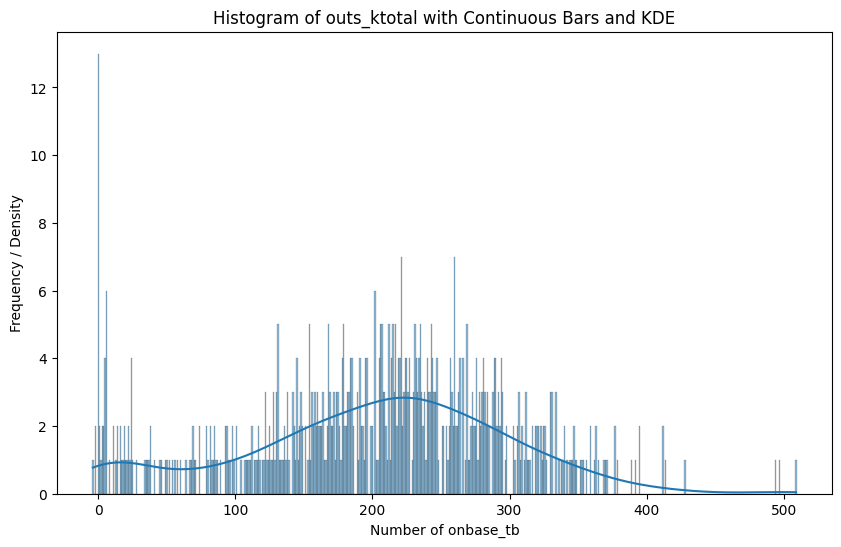

In [710]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your final training data is in a DataFrame called final_training_df
target_variable = final_training_df['passing_yards']

plt.figure(figsize=(10, 6))
sns.histplot(target_variable, kde=True, discrete=True)
plt.title('Histogram of outs_ktotal with Continuous Bars and KDE')
plt.xlabel('Number of onbase_tb')
plt.ylabel('Frequency / Density')
plt.show()

In [711]:
target_variable.unique()

array([264., 178., 205., 236.,  99., 257., 174., 186., 281., 190., 167.,
       276., 185., 339., 225., 294., 289., 184., 274., 176., 244., 211.,
       233., 151., 256., 112., 331., 245., 266., 291., 217., 154., 159.,
       320., 210., 306., 269., 196., 260., 262.,   5., 235., 268., 179.,
       241., 208., 166., 231., 377., 275., 246., 347., 290., 240., 259.,
       330., 181., 170.,  35., 326.,   6.,  22., 138., 220., 247., 111.,
        19.,  37., 145., 338., 234., 215., 207., 288., 365., 317.,   4.,
        24.,   0., 359., 200., 303., 180., 116., 370., 221., 163., 295.,
       325., 412., 251., 252., 324., 232., 369., 309., 392., 277., 258.,
       271., 356., 164., 428., 148., 323., 280., 182., 263., 283., 362.,
       342., 139., 131.,  84., 219., 224., 171., 203.,  -4., 161.,  58.,
       126., 298., 158., 191., 270., 414., 128., 195., 278., 334., 214.,
        45., 115., 183., 292.,  46., 354., 147., 304., 340., 120., 157.,
       226., 363., 134., 122.,  93., 168.,  95., 21

In [712]:
print((target_variable.value_counts(normalize=True).sort_index()))

passing_yards
-4.0      0.001577
-2.0      0.003155
 0.0      0.020505
 1.0      0.003155
 2.0      0.001577
 3.0      0.003155
 4.0      0.003155
 5.0      0.006309
 6.0      0.009464
 8.0      0.001577
 11.0     0.003155
 13.0     0.001577
 14.0     0.003155
 16.0     0.003155
 17.0     0.001577
 18.0     0.001577
 19.0     0.003155
 20.0     0.001577
 21.0     0.001577
 22.0     0.003155
 23.0     0.001577
 24.0     0.006309
 25.0     0.001577
 28.0     0.001577
 34.0     0.001577
 35.0     0.001577
 36.0     0.001577
 37.0     0.001577
 38.0     0.003155
 41.0     0.001577
 45.0     0.001577
 46.0     0.001577
 49.0     0.001577
 50.0     0.001577
 52.0     0.001577
 54.0     0.001577
 56.0     0.001577
 58.0     0.001577
 60.0     0.001577
 64.0     0.001577
 67.0     0.001577
 68.0     0.001577
 69.0     0.003155
 70.0     0.001577
 71.0     0.001577
 74.0     0.003155
 79.0     0.003155
 80.0     0.001577
 82.0     0.003155
 83.0     0.001577
 84.0     0.001577
 85.0     0.00315

In [713]:
# import numpy as np

# Specify the column for analysis
col = 'passing_yards'

# Calculate variance
variance = final_training_df[col].var()
print(f"Variance ({col}): {variance}")

# Calculate standard deviation
std_dev = final_training_df[col].std()
print(f"Standard Deviation ({col}): {std_dev}")

# Calculate range
range_val = final_training_df[col].max() - final_training_df[col].min()
print(f"Range ({col}): {range_val}")

# Calculate interquartile range (IQR)
q1 = final_training_df[col].quantile(0.25)
q3 = final_training_df[col].quantile(0.75)
iqr = q3 - q1
print(f"IQR ({col}): {iqr}")

# Calculate mean absolute deviation (MAD)
mean_val = final_training_df[col].mean()
print(f"Mean ({col}): {mean_val}")  # <--- This line prints the mean
mad = np.mean(np.abs(final_training_df[col] - mean_val))
print(f"Mean Absolute Deviation ({col}): {mad}")

# Calculate coefficient of variation (CV)
cv = (std_dev / mean_val) * 100
print(f"Coefficient of Variation (%) ({col}): {cv}")

# Calculate variance-to-mean ratio (for count data)
if mean_val != 0:
    variance_to_mean = variance / mean_val
    print(f"Variance-to-Mean Ratio ({col}): {variance_to_mean}")
else:
    print(f"Mean is zero for {col}, cannot calculate Variance-to-Mean Ratio.")


Variance (passing_yards): 9423.536153014287
Standard Deviation (passing_yards): 97.07489970643435
Range (passing_yards): 513.0
IQR (passing_yards): 120.5
Mean (passing_yards): 199.9495268138801
Mean Absolute Deviation (passing_yards): 76.63648757575456
Coefficient of Variation (%) (passing_yards): 48.54970214397907
Variance-to-Mean Ratio (passing_yards): 47.129574664040284


In [714]:
X = final_training_df.drop(columns=['passing_yards'])
y = final_training_df['passing_yards']

In [715]:
X.columns

Index(['passing_attempts_prev_7_games_career_sum',
       'passing_completions_prev_7_games_career_sum',
       'passing_cmp_pct_prev_7_games_career_mean',
       'passing_yards_prev_7_games_career_sum',
       'passing_avg_yards_prev_7_games_career_mean',
       'passing_touchdowns_prev_7_games_career_sum',
       'passing_interceptions_prev_7_games_career_sum',
       'passing_rating_prev_7_games_career_mean',
       'passing_first_downs_prev_7_games_career_sum',
       'passing_redzone_attempts_prev_7_games_career_sum',
       'passing_int_touchdowns_prev_7_games_career_sum',
       'passing_longest_prev_7_games_career_mean',
       'passing_longest_touchdown_prev_7_games_career_mean',
       'passing_air_yards_prev_7_games_career_sum',
       'passing_on_target_throws_prev_7_games_career_sum',
       'passing_defended_passes_prev_7_games_career_sum',
       'passing_dropped_passes_prev_7_games_career_sum',
       'passing_throw_aways_prev_7_games_career_sum',
       'passing_poor_t

In [716]:
X.shape

(634, 81)

In [717]:
X.dtypes

passing_attempts_prev_7_games_career_sum                   float64
passing_completions_prev_7_games_career_sum                float64
passing_cmp_pct_prev_7_games_career_mean                   float64
passing_yards_prev_7_games_career_sum                      float64
passing_avg_yards_prev_7_games_career_mean                 float64
passing_touchdowns_prev_7_games_career_sum                 float64
passing_interceptions_prev_7_games_career_sum              float64
passing_rating_prev_7_games_career_mean                    float64
passing_first_downs_prev_7_games_career_sum                float64
passing_redzone_attempts_prev_7_games_career_sum           float64
passing_int_touchdowns_prev_7_games_career_sum             float64
passing_longest_prev_7_games_career_mean                   float64
passing_longest_touchdown_prev_7_games_career_mean         float64
passing_air_yards_prev_7_games_career_sum                  float64
passing_on_target_throws_prev_7_games_career_sum           flo

In [718]:
# X.to_csv('../../../data/spain_soccer_shots_on_target_training_data_v002.csv', index= False)

In [752]:
X_train.shape

(507, 81)

In [719]:
for column in X.columns:
    # Check if the column is of boolean type
    if X[column].dtype == 'bool':
        # Convert the boolean column to integers (1 for True, 0 for False)
        X[column] = X[column].astype(int)

In [720]:
# X['opponent'] = X['opponent'].apply(lambda x:str(x))

#### poisson regressor

In [721]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Example: X (features), y (strikeouts)
# X = sm.add_constant(X)  # statsmodels requires constant
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [722]:
print(X_train.dtypes, y_train.dtypes)

passing_attempts_prev_7_games_career_sum                   float64
passing_completions_prev_7_games_career_sum                float64
passing_cmp_pct_prev_7_games_career_mean                   float64
passing_yards_prev_7_games_career_sum                      float64
passing_avg_yards_prev_7_games_career_mean                 float64
passing_touchdowns_prev_7_games_career_sum                 float64
passing_interceptions_prev_7_games_career_sum              float64
passing_rating_prev_7_games_career_mean                    float64
passing_first_downs_prev_7_games_career_sum                float64
passing_redzone_attempts_prev_7_games_career_sum           float64
passing_int_touchdowns_prev_7_games_career_sum             float64
passing_longest_prev_7_games_career_mean                   float64
passing_longest_touchdown_prev_7_games_career_mean         float64
passing_air_yards_prev_7_games_career_sum                  float64
passing_on_target_throws_prev_7_games_career_sum           flo

#### Poisson Regressor

In [723]:
# poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

# Predict expected strikeouts (λ)
# lambda_pred = poisson_model.predict(X_train)

In [724]:
# deviance = poisson_model.deviance
# aic = poisson_model.aic
# model_df = poisson_model.df_model
# residual_df = poisson_model.df_resid

# print("Deviance:", deviance)
# print("AIC:", aic)
# print(f"Model Degrees of Freedom: {model_df}")
# print(f"Residual Degrees of Freedom: {residual_df}")
# print(f'devience to residual df ratio: {deviance/residual_df}')

##### calculating the over provbability by using CDF

In [725]:
# Probability of over 6.5 strikeouts:
# from scipy.stats import poisson

# For threshold 6.5, we compute P(strikeouts > 6) = 1 - P(k ≤ 6)
# prob_over_6_5 = 1 - poisson.cdf(6, mu=lambda_pred)

#### Negative Binomial distribution

In [726]:
# # Fit Negative Binomial regression model
# negbinom_model = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial()).fit()

# # Print summary of the model
# print(negbinom_model.summary())

In [727]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100,  # Number of trees in the forest
                                 random_state=42,
                                 n_jobs=-1,       # Use all available cores
                                 max_depth=10,    # Maximum depth of the trees (tune this)
                                 min_samples_split=2, # Minimum samples required to split a node (tune this)
                                 min_samples_leaf=1)  # Minimum samples required at a leaf node (tune this)

rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

##### function to calculate the prediction and the over and under probability

In [728]:
def predict(model, y_test, threshold):

    strikeout_prediction = model.predict(y_test)
    y_test = y_test.values.reshape(1, -1) \
                              if isinstance(y_test, pd.Series) \
                              else y_test.reshape(1, -1)
    
    preds_array = np.array([tree.predict(y_test)[0] for tree in model.estimators_])

    mean_pred = np.mean(preds_array)
    std_dev_pred = np.std(preds_array)

    # Create the fitted normal distribution
    fitted_normal_dist = norm(loc=mean_pred, scale=std_dev_pred)

    if std_dev_pred == 0:
        prob_over_threshold = 1.0 if strikeout_prediction > threshold else 0.0
        prob_under_threshold = 1.0 - prob_over_threshold
    else:
        # Create the fitted normal distribution
        fitted_normal_dist = norm(loc=mean_pred, scale=std_dev_pred)

        # Calculate probability over the threshold (Survival Function)
        prob_over_threshold = fitted_normal_dist.sf(threshold)

        # Calculate probability under the threshold (Cumulative Distribution Function)
        prob_under_threshold = fitted_normal_dist.cdf(threshold)

    print(f"Overall Prediction: {strikeout_prediction:.4f}")
    print(f"Parametric P(X > {threshold}) (Over Probability): {prob_over_threshold:.4f}")
    print(f"Parametric P(X <= {threshold}) (Under Probability): {prob_under_threshold:.4f}")

    return {
        'overall_prediction': strikeout_prediction,
        'prob_over_threshold': prob_over_threshold,
        'prob_under_threshold': prob_under_threshold
    }
        

##### calculate the over probability using prediction distribution

In [729]:
X_exp = X_test.iloc[0]
y_exp = y_test.iloc[0]

X_exp = X_exp.values.reshape(1, -1) \
                              if isinstance(X_exp, pd.Series) \
                              else X_exp.reshape(1, -1)
X_exp

array([[2.27000000e+02, 1.47000000e+02, 6.55740000e+01, 1.64900000e+03,
        7.36957143e+00, 8.00000000e+00, 4.00000000e+00, 9.09857143e+01,
        7.60000000e+01, 3.70000000e+01, 0.00000000e+00, 4.20000000e+01,
        3.20000000e+01, 8.73000000e+02, 1.59000000e+02, 2.50000000e+01,
        8.00000000e+00, 7.00000000e+00, 4.00000000e+01, 0.00000000e+00,
        8.00000000e+00, 1.00000000e+01, 5.80000000e+01, 6.80000000e+01,
        1.60000000e+01, 3.10000000e+01, 5.57239000e+02, 2.46157143e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.54000000e+02,
        1.65000000e+02, 4.19000000e+02, 1.90000000e+01, 1.06000000e+02,
        5.00000000e+00, 2.30000000e+01, 2.00000000e+00, 1.000000

In [730]:
trees = rf_model.estimators_
# trees

In [731]:
# all_preds = [tree.predict(X_exp) for tree in trees]
# all_preds
all_predictions = []
for tree in trees:
    predictions = tree.predict(X_exp)
    all_predictions.append(predictions)
all_predictions

[array([121.64285714]),
 array([242.33333333]),
 array([144.4]),
 array([258.]),
 array([257.4]),
 array([156.5]),
 array([191.90384615]),
 array([233.02531646]),
 array([150.41666667]),
 array([108.6]),
 array([241.]),
 array([227.58695652]),
 array([237.52702703]),
 array([137.]),
 array([154.]),
 array([50.5]),
 array([248.23529412]),
 array([224.53211009]),
 array([342.]),
 array([256.47474747]),
 array([154.]),
 array([184.42857143]),
 array([279.66666667]),
 array([238.08695652]),
 array([231.]),
 array([240.5]),
 array([211.]),
 array([330.]),
 array([225.]),
 array([307.75]),
 array([110.]),
 array([218.5862069]),
 array([175.]),
 array([254.82485876]),
 array([347.]),
 array([196.62790698]),
 array([152.72727273]),
 array([185.]),
 array([242.]),
 array([187.13513514]),
 array([189.]),
 array([300.47826087]),
 array([324.25]),
 array([377.]),
 array([144.]),
 array([184.88888889]),
 array([6.]),
 array([142.09090909]),
 array([277.375]),
 array([50.]),
 array([154.22222222]),


In [732]:
preds_array = np.array([arr[0] for arr in all_predictions])

preds_array

array([121.64285714, 242.33333333, 144.4       , 258.        ,
       257.4       , 156.5       , 191.90384615, 233.02531646,
       150.41666667, 108.6       , 241.        , 227.58695652,
       237.52702703, 137.        , 154.        ,  50.5       ,
       248.23529412, 224.53211009, 342.        , 256.47474747,
       154.        , 184.42857143, 279.66666667, 238.08695652,
       231.        , 240.5       , 211.        , 330.        ,
       225.        , 307.75      , 110.        , 218.5862069 ,
       175.        , 254.82485876, 347.        , 196.62790698,
       152.72727273, 185.        , 242.        , 187.13513514,
       189.        , 300.47826087, 324.25      , 377.        ,
       144.        , 184.88888889,   6.        , 142.09090909,
       277.375     ,  50.        , 154.22222222, 151.69230769,
       147.5       , 203.21875   , 213.5       , 154.        ,
       128.8       , 254.08510638, 242.4109589 , 165.76666667,
       153.1875    , 191.22222222, 154.        , 267.46

In [733]:
pred_err = preds_array-y_exp
pred_err

array([ -38.35714286,   82.33333333,  -15.6       ,   98.        ,
         97.4       ,   -3.5       ,   31.90384615,   73.02531646,
         -9.58333333,  -51.4       ,   81.        ,   67.58695652,
         77.52702703,  -23.        ,   -6.        , -109.5       ,
         88.23529412,   64.53211009,  182.        ,   96.47474747,
         -6.        ,   24.42857143,  119.66666667,   78.08695652,
         71.        ,   80.5       ,   51.        ,  170.        ,
         65.        ,  147.75      ,  -50.        ,   58.5862069 ,
         15.        ,   94.82485876,  187.        ,   36.62790698,
         -7.27272727,   25.        ,   82.        ,   27.13513514,
         29.        ,  140.47826087,  164.25      ,  217.        ,
        -16.        ,   24.88888889, -154.        ,  -17.90909091,
        117.375     , -110.        ,   -5.77777778,   -8.30769231,
        -12.5       ,   43.21875   ,   53.5       ,   -6.        ,
        -31.2       ,   94.08510638,   82.4109589 ,    5.76666

In [734]:
np.mean(preds_array)

np.float64(201.76083557851507)

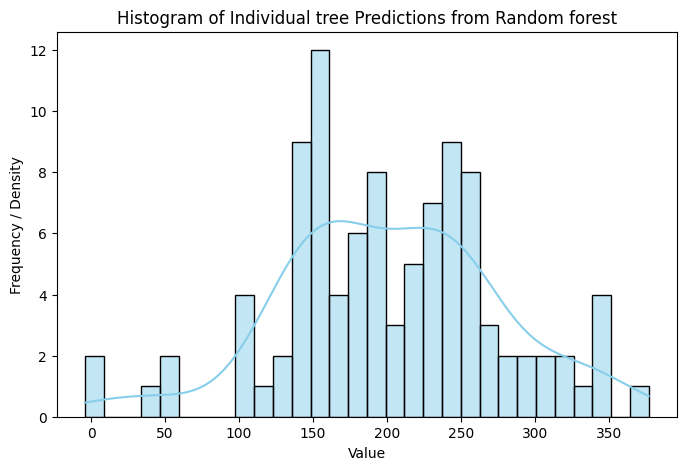

In [735]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5)) # Optional: Set figure size for better readability

sns.histplot(data=preds_array, bins=30, kde=True, color='skyblue', edgecolor='black')

# Add labels and title for clarity
plt.xlabel("Value")
plt.ylabel("Frequency / Density") # Y-axis label changes if kde=True
plt.title("Histogram of Individual tree Predictions from Random forest")

# Display the plot
plt.show()

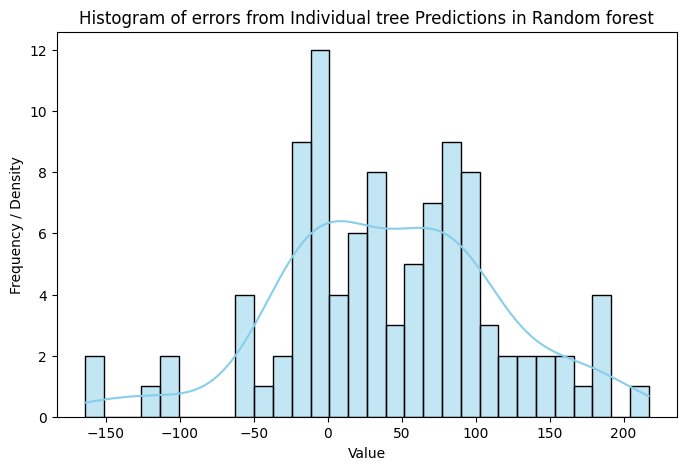

In [736]:
plt.figure(figsize=(8, 5)) # Optional: Set figure size for better readability

sns.histplot(data=pred_err, bins=30, kde=True, color='skyblue', edgecolor='black')

# Add labels and title for clarity
plt.xlabel("Value")
plt.ylabel("Frequency / Density") # Y-axis label changes if kde=True
plt.title("Histogram of errors from Individual tree Predictions in Random forest")

# Display the plot
plt.show()

In [737]:
def empirical_cdf(data, threshold):
    """
    Calculates the Empirical Cumulative Distribution Function (ECDF)
    at a specific x_value for a given dataset.
    """
    data = np.array(data)
    if len(data) == 0:
        return 0.0
    return np.sum(data <= threshold) / len(data)

In [738]:
from scipy.stats import norm
mean_pred = np.mean(preds_array)
std_dev_pred = np.std(preds_array)

# Create the fitted normal distribution
fitted_normal_dist = norm(loc=mean_pred, scale=std_dev_pred)

In [739]:
threshold = 5
ecdf_at_x = empirical_cdf(preds_array, threshold= threshold)
print(f"ECDF at {threshold}: {ecdf_at_x:.4f}") # Should be 0.6


prob_greater_than_threshold = fitted_normal_dist.sf(threshold)
print(f"Parametric P(X > {threshold}) (using Normal dist): {prob_greater_than_threshold:.4f}")

ECDF at 5: 0.0100
Parametric P(X > 5) (using Normal dist): 0.9963


In [740]:
# with open('../../../models/spain_soccer_rf_2024_v001.pkl', 'wb') as f:
#     pickle.dump(rf_model, f)

In [741]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [742]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Random Forest Regressor Evaluation:
Mean Squared Error (MSE): 7269.18
Mean Absolute Error (MAE): 65.36
R-squared (R2): 0.15


In [743]:
# Note on handling count data with RandomForestRegressor:
# RandomForestRegressor predicts continuous values. For count data, the predictions will be floating-point numbers.
# You might want to round these predictions to the nearest integer for interpretation as counts.
y_pred_rounded = np.round(y_pred).astype(int)

print("\nRounded Predictions (first 20):")
print(y_pred_rounded[:20])
print("\nActual Test Values (first 20):")
print(y_test.head(20).values)

# Evaluate rounded predictions (
mse_rounded = mean_squared_error(y_test, y_pred_rounded)
mae_rounded = mean_absolute_error(y_test, y_pred_rounded)
r2_rounded = r2_score(y_test, y_pred_rounded)

print("\nRandom Forest Regressor Evaluation (Rounded Predictions):")
print(f"Mean Squared Error (MSE): {mse_rounded:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rounded:.2f}")
print(f"R-squared (R2): {r2_rounded:.2f}")


Rounded Predictions (first 20):
[202 192 195 170 208 220 232 207 254  78  81 213 210 286 228 199 224 213
 209 248]

Actual Test Values (first 20):
[160. 236.  94. 220. 207. 184. 164. 290. 290. 104. 101. 217. 354. 231.
 278. 269. 205. 226. 214. 166.]

Random Forest Regressor Evaluation (Rounded Predictions):
Mean Squared Error (MSE): 7272.09
Mean Absolute Error (MAE): 65.38
R-squared (R2): 0.15


In [749]:
# Define the bins (bucket boundaries)
bins = [-1, 0, 5, 10, 50, 100, 200, 400, float('inf')] # -1 to capture exactly 0, float('inf') for the open-ended last bucket

# Define the labels for each bucket
labels = ['<0', '0-5', '5-10', '10-50', '50-100', '100-200', '200-400', '400+']

# Use pd.cut to categorize the data into buckets
y_test_buckets = pd.cut(y_train, bins=bins, labels=labels, right=False)
# 'right=False' means the bins include the left boundary but exclude the right boundary,
# e.g., [0, 5) means 0 up to (but not including) 5.

# Get the count of values in each bucket
distribution = y_test_buckets.value_counts().sort_index()
print(distribution)

passing_yards
<0           0
0-5         17
5-10         8
10-50       28
50-100      31
100-200    133
200-400    283
400+         5
Name: count, dtype: int64


In [745]:
# # Assuming X_test contains the features for prediction
# y_pred = rf_model.predict(X_test)

# # Assuming y_test is a DataFrame or you want to create one for results
# # If y_test is a Series, convert it to a DataFrame first if you want to add a new column
# if isinstance(y_test, pd.Series):
#     y_test_df = y_test.to_frame(name='actual_values') # Name the column appropriately
# else:
#     y_test_df = y_test

# y_test_df['preds'] = y_pred
# y_test_df.to_csv('../../../data/spain_soccer_shots_on_target_y_test.csv', index=False)

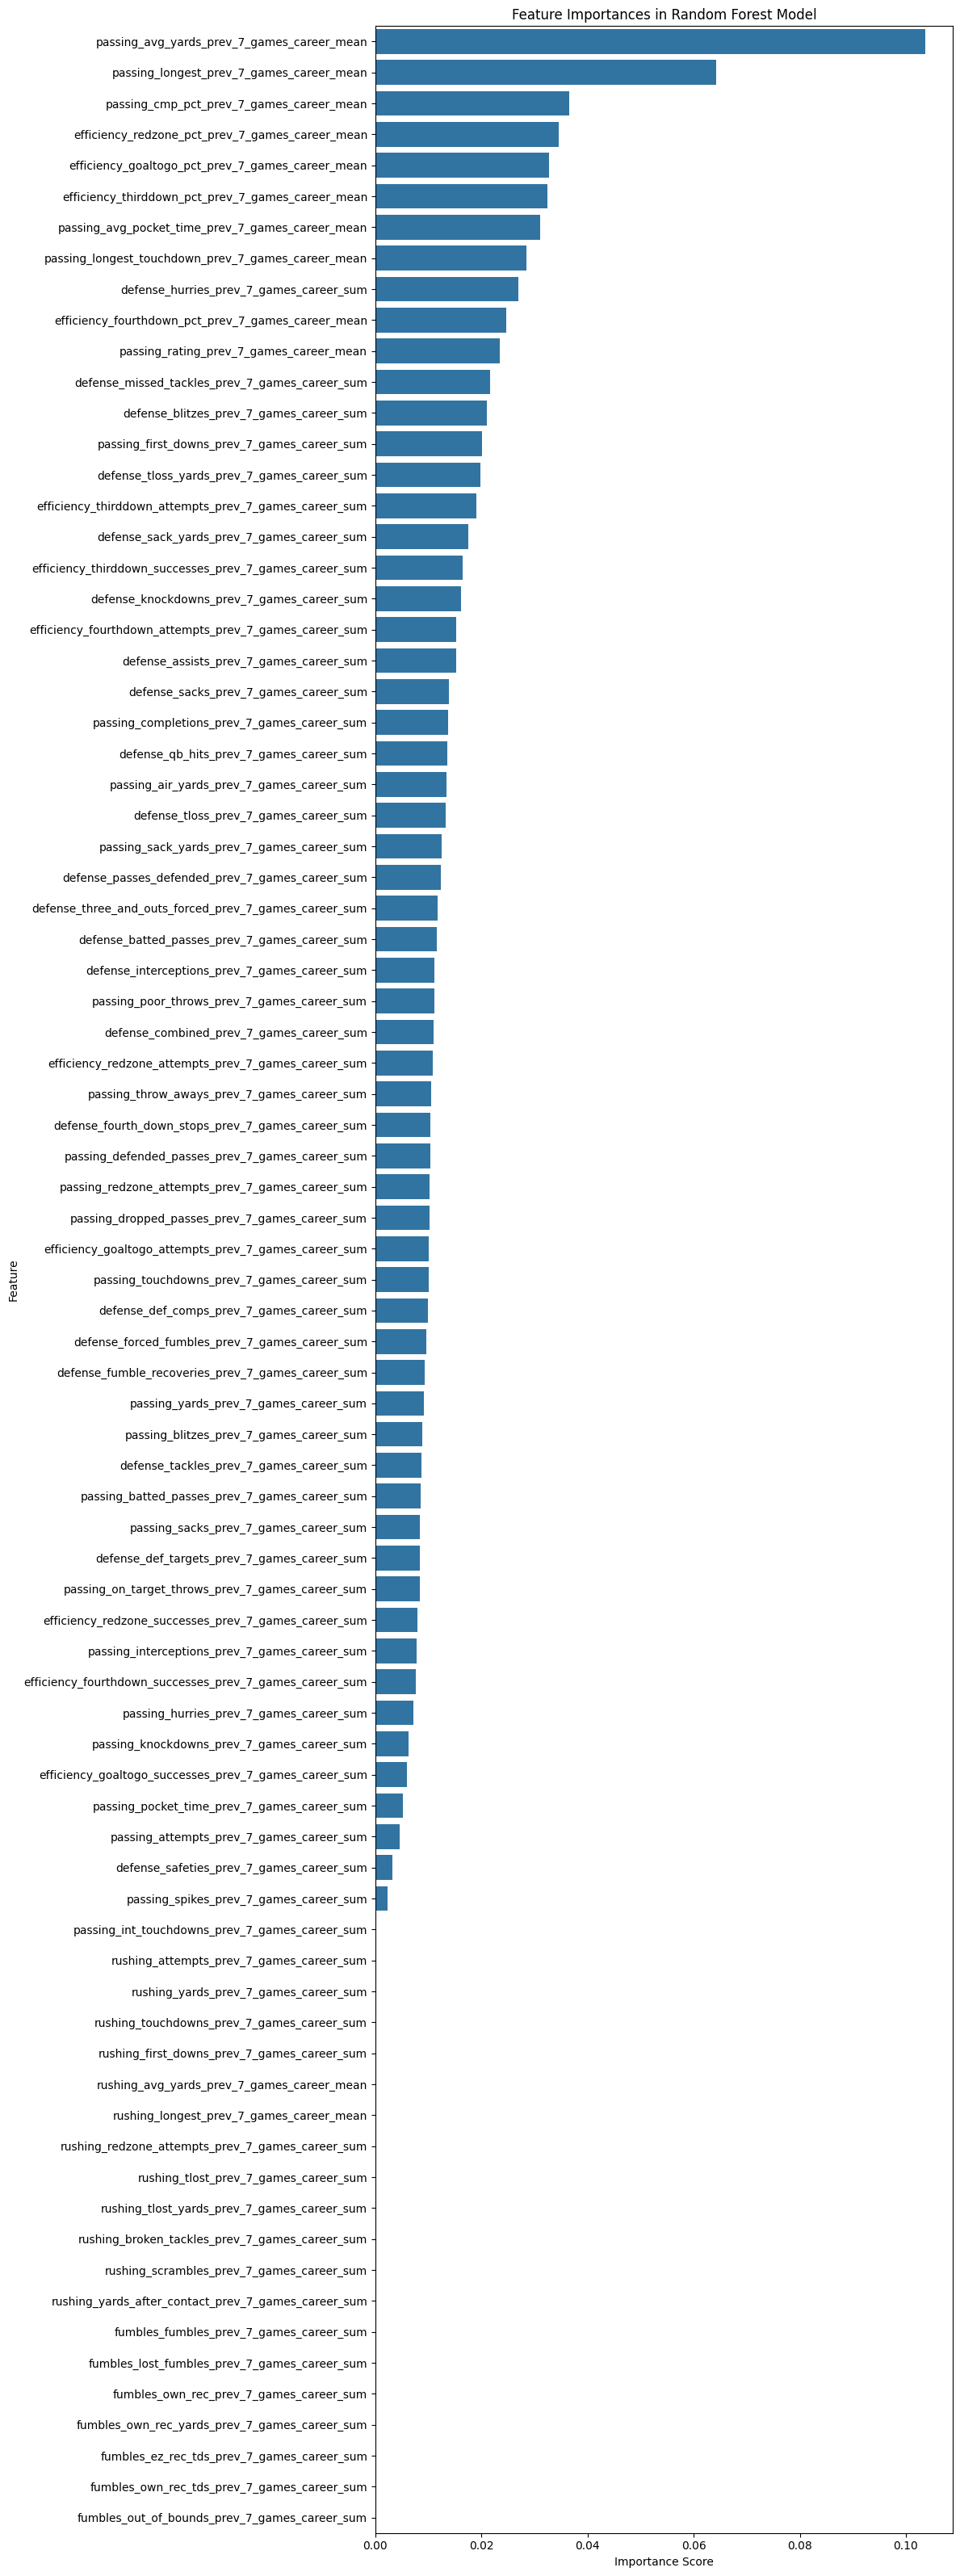


Feature Importance:
passing_avg_yards_prev_7_games_career_mean: 0.1037
passing_longest_prev_7_games_career_mean: 0.0642
passing_cmp_pct_prev_7_games_career_mean: 0.0365
efficiency_redzone_pct_prev_7_games_career_mean: 0.0345
efficiency_goaltogo_pct_prev_7_games_career_mean: 0.0328
efficiency_thirddown_pct_prev_7_games_career_mean: 0.0324
passing_avg_pocket_time_prev_7_games_career_mean: 0.0311
passing_longest_touchdown_prev_7_games_career_mean: 0.0285
defense_hurries_prev_7_games_career_sum: 0.0270
efficiency_fourthdown_pct_prev_7_games_career_mean: 0.0247
passing_rating_prev_7_games_career_mean: 0.0235
defense_missed_tackles_prev_7_games_career_sum: 0.0216
defense_blitzes_prev_7_games_career_sum: 0.0211
passing_first_downs_prev_7_games_career_sum: 0.0202
defense_tloss_yards_prev_7_games_career_sum: 0.0198
efficiency_thirddown_attempts_prev_7_games_career_sum: 0.0191
defense_sack_yards_prev_7_games_career_sum: 0.0174
efficiency_thirddown_successes_prev_7_games_career_sum: 0.0165
defen

In [746]:
# Feature Importance
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns
sorted_importance = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)
sorted_feature_names = [item[0] for item in sorted_importance]
sorted_importances = [item[1] for item in sorted_importance]

# Create the bar plot
plt.figure(figsize=(12, 32))
sns.barplot(x=sorted_importances, y=sorted_feature_names)
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nFeature Importance:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.4f}")

In [ ]:
# with open('../../../../models/nfl_qb_passing_yards_player_opponent_stats_v001.pkl', 'wb') as f:
#     pickle.dump(rf_model, f)

In [580]:
from sklearn.model_selection import cross_val_score, KFold

n_splits = 5 # For example, 5-fold cross-validation

print(f"Performing {n_splits}-fold cross-validation...")

# --- Evaluate using Mean Squared Error (MSE) ---
# cross_val_score by default tries to maximize the score, so for MSE (which is a loss),
# we need to specify 'neg_mean_squared_error' and then negate the result.
mse_scores = -cross_val_score(rf_model, X_train, y_train, cv=n_splits, scoring='neg_mean_squared_error', n_jobs=-1)
print(f"Cross-validated MSE scores for each fold: {mse_scores}")
print(f"Mean Cross-validated MSE: {np.mean(mse_scores):.4f}")
print(f"Standard Deviation of Cross-validated MSE: {np.std(mse_scores):.4f}")

print("\n" + "="*50 + "\n")

# --- Evaluate using Mean Absolute Error (MAE) ---
mae_scores = -cross_val_score(rf_model, X_train, y_train, cv=n_splits, scoring='neg_mean_absolute_error', n_jobs=-1)
print(f"Cross-validated MAE scores for each fold: {mae_scores}")
print(f"Mean Cross-validated MAE: {np.mean(mae_scores):.4f}")
print(f"Standard Deviation of Cross-validated MAE: {np.std(mae_scores):.4f}")

print("\n" + "="*50 + "\n")

# --- Evaluate using R-squared (R2) ---
r2_scores = cross_val_score(rf_model, X_train, y_train, cv=n_splits, scoring='r2', n_jobs=-1)
print(f"Cross-validated R2 scores for each fold: {r2_scores}")
print(f"Mean Cross-validated R2: {np.mean(r2_scores):.4f}")
print(f"Standard Deviation of Cross-validated R2: {np.std(r2_scores):.4f}")

print("\nCross-validation complete.")


Performing 5-fold cross-validation...
Cross-validated MSE scores for each fold: [9474.65294653 9575.58814568 8059.37012599 8103.64442398 8179.89039378]
Mean Cross-validated MSE: 8678.6292
Standard Deviation of Cross-validated MSE: 692.9674


Cross-validated MAE scores for each fold: [79.99189911 76.40883414 73.90624517 71.36295311 72.15791337]
Mean Cross-validated MAE: 74.7656
Standard Deviation of Cross-validated MAE: 3.1347


Cross-validated R2 scores for each fold: [0.08611274 0.09742425 0.13251838 0.10365577 0.03229446]
Mean Cross-validated R2: 0.0904
Standard Deviation of Cross-validated R2: 0.0328

Cross-validation complete.


In [260]:
from sklearn.model_selection import GridSearchCV

# --- Hyperparameter Tuning with GridSearchCV ---
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200], # Number of trees
    'max_depth': [None, 10, 20],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
# We use 'neg_mean_squared_error' as the scoring metric for tuning
# cv=n_splits ensures that tuning is also done with cross-validation
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=n_splits,
                           scoring='neg_mean_squared_error', # Use a single metric for tuning
                           n_jobs=-1,
                           verbose=2) # Set verbose to 2 to see progress

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print("\nHyperparameter tuning complete.")

# Print the best parameters and best score found
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validated MSE (negative, so smaller absolute value is better): {-grid_search.best_score_:.4f}")

# Get the best model
best_rf_model = grid_search.best_estimator_
print("\nBest Random Forest Regressor model (after tuning):")
print(best_rf_model)

# You can now use best_rf_model for final predictions on X_test
# For example:
y_pred_tuned = best_rf_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f"\nMSE on test set with tuned model: {mse_tuned:.4f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits

Hyperparameter tuning complete.
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validated MSE (negative, so smaller absolute value is better): 7667.2283

Best Random Forest Regressor model (after tuning):
RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=200, n_jobs=-1, random_state=42)

MSE on test set with tuned model: 5321.6629


In [261]:
rf_model_hp_tuned = RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=200, n_jobs=-1, random_state=42)

rf_model_hp_tuned.fit(X_train, y_train)

y_preds_hp = rf_model_hp_tuned.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_preds_hp)
mae = mean_absolute_error(y_test, y_preds_hp)
r2 = r2_score(y_test, y_preds_hp)

print("Random Forest Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Random Forest Regressor Evaluation:
Mean Squared Error (MSE): 5321.66
Mean Absolute Error (MAE): 57.41
R-squared (R2): 0.23


In [ ]:
# with open('../../../models/spain_soccer_strikeouts_rf_hp_tuned_2024_v001.pkl', 'wb') as f:
#     pickle.dump(rf_model, f)
# with open('../../../../models/nfl_qb_passing_yards_v002.pkl', 'wb') as f:
#     pickle.dump(rf_model_hp_tuned, f)

In [ ]:
print("Fitting Zero-Inflated Poisson (ZIP) Model...")
try:
    zip_model = sm.ZeroInflatedPoisson(
        endog=y_train,        # Dependent variable (counts)
        exog=X_train,         # Independent variables for the count part (Poisson) - now includes constant
        exog_infl=X_train     # Independent variables for the zero-inflation part (logistic) - now includes constant
    )

    # Fit the model
    zip_results = zip_model.fit()

    print("\nZIP Model Summary:")
    print(zip_results.summary())
    print("-" * 50)

    # --- 3. Make Predictions ---
    # Predictions from ZeroInflatedPoisson are expected values (can be float)
    y_pred_zip_continuous = zip_results.predict(exog=X_test, exog_infl=X_test) # Updated: Use X_test directly

    # Since the target is counts, post-process by rounding and ensuring non-negativity
    y_pred_zip_final = np.round(y_pred_zip_continuous)
    y_pred_zip_final = np.maximum(0, y_pred_zip_final) # Ensure no negative counts

    print("\nPredictions made and post-processed.")
    print(f"Sample of continuous predictions: {y_pred_zip_continuous[:5]}")
    print(f"Sample of final (rounded & clipped) predictions: {y_pred_zip_final[:5]}")
    print("-" * 50)

    # --- 4. Evaluate the Model ---
    print("Evaluating ZIP Model performance:")
    mse = mean_squared_error(y_test, y_pred_zip_final)
    mae = mean_absolute_error(y_test, y_pred_zip_final)
    r2 = r2_score(y_test, y_pred_zip_final)

    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R2): {r2:.4f}")
    print("-" * 50)

except Exception as e:
    print(f"An error occurred during model fitting or prediction: {e}")
    print("Please ensure your 'endog' (y) values are non-negative and your 'exog' (X) values are appropriate.")
    print("Also, ensure 'statsmodels' is installed (`pip install statsmodels`).")

Fitting Zero-Inflated Poisson (ZIP) Model...


C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\discrete_model.py:1331: RuntimeWarning: overflow encountered in exp
  return -np.exp(XB) +  endog*XB - gammaln(endog+1)
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Pytho

         Current function value: 4251.490799
         Iterations: 5
         Function evaluations: 48
         Gradient evaluations: 27


C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\count_model.py:629: RuntimeWarning: overflow encountered in exp
  coeff = (1 + w[zero_idx] * (np.exp(mu[zero_idx]) - 1))
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\count_model.py:637: RuntimeWarning: overflow encountered in exp
  w[zero_idx] * mu[zero_idx] * np.exp(mu[zero_idx]) /
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\count_model.py:637: RuntimeWarning: invalid value encountered in divide
  w[zero_idx] * mu[zero_idx] * np.exp(mu[zero_idx]) /
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\si


ZIP Model Summary:
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:             runs_earned   No. Observations:                15773
Model:             ZeroInflatedPoisson   Df Residuals:                    15593
Method:                            MLE   Df Model:                          179
Date:                 Tue, 27 May 2025   Pseudo R-squ.:                  -3171.
Time:                         10:51:40   Log-Likelihood:            -6.7059e+07
converged:                       False   LL-Null:                       -21141.
Covariance Type:             nonrobust   LLR p-value:                     1.000
                                                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
inflate_venue_capacity                                                

C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
